In [43]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import math
import random
from matplotlib.patches import FancyArrowPatch
from matplotlib import patheffects as pe

In [16]:
backend_asset = pd.read_csv('/Users/ngantram/Documents/Thesis UvA/Thesis/data 1.0/backend_asset.csv', delimiter=',')
backend_assetrelationship = pd.read_csv('/Users/ngantram/Documents/Thesis UvA/Thesis/data 1.0/backend_assetrelationship.csv', delimiter=',')
backend_assetrelationshipservice = pd.read_csv('/Users/ngantram/Documents/Thesis UvA/Thesis/data 1.0/backend_assetrelationshipservice.csv', delimiter=',')
backend_assettype = pd.read_csv('/Users/ngantram/Documents/Thesis UvA/Thesis/data 1.0/backend_assettype.csv', delimiter=',')

/var/folders/w6/y_7zdy0j1r1b354yw7wj0vgc0000gn/T/ipykernel_19285/3425762865.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  backend_asset = pd.read_csv('/Users/ngantram/Documents/Thesis UvA/Thesis/data 1.0/backend_asset.csv', delimiter=',')


In [17]:
# Categorize assets in backend_assets
asset_merged = backend_asset.merge(
    backend_assettype[['id', 'category']],
    left_on='asset_type_id',
    right_on='id',
    how='left',
    suffixes=('', '_type')
)
asset_merged['category'] = asset_merged['category'].fillna('Uncategorized')
asset_merged.head()

id name  \
0  93c84f4c-e251-443e-aedb-0f6d08fbbbb0  NaN   
1  1c3225eb-bd10-4065-8528-f8d5f42cff5b  NaN   
2  3e5887e1-9b95-4884-91a2-e67ec01d83ba  NaN   
3  cbc95c38-42fe-473a-bcdb-63869fb7f7d5  NaN   
4  dc032904-bec1-4296-8f84-c06a48fbbe28  NaN   

                                    hostname           ipaddress  active  \
0  ec2-3-230-209-14.compute-1.amazonaws.com.   192.168.102.11/24    True   
1                                        NaN    192.168.45.15/24    True   
2                                        NaN  192.168.101.138/24    True   
3                                        NaN       192.168.0.139    True   
4                   DTNBATELIER.sasyb.local.  192.168.103.136/24    True   

                        date_created                       date_updated  \
0  2024-10-31 12:17:34.266569 +00:00  2025-03-10 10:11:19.677025 +00:00   
1  2024-11-21 21:51:25.292424 +00:00  2025-03-10 10:11:19.128591 +00:00   
2  2025-01-11 11:57:55.251735 +00:00  2025-03-10 10:11:19.430381 +00:00   
3  2024-12-16 20:09:26.114348 +00:00  2025-03-10 10:11:20.169085 +00:00   
4  2025-01-09 14:56:37.313210 +00:00  2025-03-10 10:11:18.436401 +00:00   

   assigned_value                         asset_type_id  \
0               0  656c360c-f7e0-4026-b421-771f273958d2   
1               0  12d5edc6-3b58-404e-93c4-1967b56e3c6d   
2               0  12d5edc6-3b58-404e-93c4-1967b56e3c6d   
3               0  12d5edc6-3b58-404e-93c4-1967b56e3c6d   
4               0  12d5edc6-3b58-404e-93c4-1967b56e3c6d   

                            location_id        mac_address  estimated_value  \
0  a5bf22d9-1b8a-4e95-9c19-2c4fbae70f29  b6:b9:76:54:2d:f6              430   
1  a5bf22d9-1b8a-4e95-9c19-2c4fbae70f29  00:09:0f:09:00:06                0   
2  a5bf22d9-1b8a-4e95-9c19-2c4fbae70f29  00:09:0f:09:00:06                0   
3  a5bf22d9-1b8a-4e95-9c19-2c4fbae70f29  00:09:0f:09:00:06                0   
4  a5bf22d9-1b8a-4e95-9c19-2c4fbae70f29  00:09:0f:09:00:06               10   

   computed_value vlan_ids                      last_reported  \
0             430   {2102}  2025-02-02 11:20:48.000000 +00:00   
1               0   {2102}  2025-02-09 01:35:20.000000 +00:00   
2               0    {120}  2025-02-15 20:04:00.000000 +00:00   
3               0   {2101}  2025-01-20 05:04:13.000000 +00:00   
4              10    {120}  2025-02-06 15:26:47.000000 +00:00   

                        parent_asset_id processing_state  \
0  0c9d1848-0ee1-4641-a7da-2a7313c45b74        PROCESSED   
1  1fe7e185-f0fb-44bc-a41f-9a357e3ff77f        PROCESSED   
2  926411cd-ed42-44e4-ab52-c8edea870c45        PROCESSED   
3                                   NaN        PROCESSED   
4  a4c6b641-dcf8-4a1f-a4c6-4b68aac086b8        PROCESSED   

                                id_type category  
0  656c360c-f7e0-4026-b421-771f273958d2    Other  
1  12d5edc6-3b58-404e-93c4-1967b56e3c6d  Network  
2  12d5edc6-3b58-404e-93c4-1967b56e3c6d  Network  
3  12d5edc6-3b58-404e-93c4-1967b56e3c6d  Network  
4  12d5edc6-3b58-404e-93c4-1967b56e3c6d  Network

**VLAN51**

In [18]:
vlan_51 = asset_merged[asset_merged['vlan_ids'] == '{51}']

In [19]:
min_value = vlan_51['computed_value'].min()
max_value = vlan_51['computed_value'].max()
mean_value = vlan_51['computed_value'].mean()


print(f"Minimum: {min_value}")
print(f"Maximum: {max_value}")
print(f"Average: {mean_value}")

Minimum: 0
Maximum: 47693
Average: 1024.0


In [22]:
vlan_51_relationships = backend_assetrelationship[
    (backend_assetrelationship['source_asset_id'].isin(vlan_51['id'])) |
    (backend_assetrelationship['target_asset_id'].isin(vlan_51['id']))
]

print("Relationships in VLAN 51:")
vlan_51_relationships.head()

Relationships in VLAN 51:


id  tags  \
3   84f8042f-bdc7-490c-85b5-8b49d77ecb93   NaN   
8   7d2463ec-d75c-493b-84ea-1f8cd75bd9b4   NaN   
9   84a40e20-0e4d-4ca9-a4a6-a2ecd107bec5   NaN   
17  972128ed-632d-48fb-9c69-2934238d9fb4   NaN   
18  e73663b2-1f16-4c29-8bae-82414ffe3e5b   NaN   

                         date_created                       date_updated  \
3   2024-10-09 20:52:11.673865 +00:00  2024-10-09 20:52:11.673888 +00:00   
8   2024-10-09 20:53:42.345599 +00:00  2024-10-09 20:53:42.345619 +00:00   
9   2024-10-09 20:53:49.451848 +00:00  2024-10-09 20:53:49.451867 +00:00   
17  2024-10-09 20:57:29.377159 +00:00  2024-10-09 20:57:29.377179 +00:00   
18  2024-10-09 20:57:49.103489 +00:00  2024-10-09 20:57:49.103511 +00:00   

                         source_asset_id                       target_asset_id  
3   d3cf9c44-444a-4981-a4b7-43182e79507a  3a606798-de39-46a6-bdd7-4e02547c379c  
8   3a606798-de39-46a6-bdd7-4e02547c379c  ea2cea5b-1f0f-4336-ac82-7260ac99e8ca  
9   ea2cea5b-1f0f-4336-ac82-7260ac99e8ca  3a606798-de39-46a6-bdd7-4e02547c379c  
17  3a606798-de39-46a6-bdd7-4e02547c379c  e9e2269a-afa3-4c87-a25c-3826f0e7b038  
18  e9e2269a-afa3-4c87-a25c-3826f0e7b038  3a606798-de39-46a6-bdd7-4e02547c379c

In [21]:
service_51 = backend_assetrelationshipservice[
    backend_assetrelationshipservice['relationship_id'].isin(vlan_51_relationships['id'])]
service_51

id  source_port  target_port  \
26      6edcd904-8ed1-4d62-b125-798cb208346f         5353         5353   
192     1aa44686-b9df-4750-813c-214ec319f5e2        46945           53   
214     6bf23a15-beb4-41b1-b809-793ad0d85eec          443        34750   
218     f25e524c-fa14-4e49-ae83-66b0a9b3d56e        38188          443   
241     a313566e-3e06-4f10-8a25-2a70f2812460        46945           53   
...                                      ...          ...          ...   
801613  cc0c9653-0866-433b-b704-47deb108c374          502        54634   
807329  ddcdbb51-96bd-414e-9039-12cb5c181caf        49140          123   
807330  0dbee304-2317-4f3e-a110-ba63f53463c7          123        49140   
809295  272d6525-b343-4be9-b40a-b949d0299632        33305          123   
809296  a9519e10-1645-4a34-9550-6e58e07de678          123        33305   

       protocol                       date_created  \
26          UDP  2024-10-10 03:00:50.079813 +00:00   
192         UDP  2024-10-10 18:57:24.579670 +00:00   
214         TCP  2024-10-11 16:07:31.299932 +00:00   
218         TCP  2024-10-10 22:10:52.459922 +00:00   
241         UDP  2024-10-10 18:57:24.877528 +00:00   
...         ...                                ...   
801613      UDP  2025-01-16 09:33:27.304147 +00:00   
807329      UDP  2025-01-08 14:22:05.445417 +00:00   
807330      UDP  2025-01-08 14:22:06.076441 +00:00   
809295      UDP  2025-01-10 23:46:02.412749 +00:00   
809296      UDP  2025-01-10 23:46:03.209679 +00:00   

                             date_updated  \
26      2024-10-10 03:00:50.079831 +00:00   
192     2024-10-10 18:57:24.579691 +00:00   
214     2024-10-11 16:07:31.299952 +00:00   
218     2024-10-10 22:10:52.459938 +00:00   
241     2024-10-10 18:57:24.877553 +00:00   
...                                   ...   
801613  2025-01-16 09:33:27.304175 +00:00   
807329  2025-01-08 14:22:05.445440 +00:00   
807330  2025-01-08 14:22:06.076464 +00:00   
809295  2025-01-10 23:46:02.412774 +00:00   
809296  2025-01-10 23:46:03.209705 +00:00   

                             relationship_id  \
26      42f94dfc-62ec-4164-962b-f6fb1c302aa9   
192     8d69ff7d-26e1-4449-b4e7-1ec54b455a9c   
214     b7692090-44d8-43f9-adb6-70827854013f   
218     9e48f545-dd2e-48dc-93c5-5a670e8eb411   
241     8d69ff7d-26e1-4449-b4e7-1ec54b455a9c   
...                                      ...   
801613  20627839-fb88-4db3-b168-1b149a2a100f   
807329  1e970171-27d8-4292-b448-113619f2a369   
807330  1d8c9907-eff5-4403-b950-328827a332f9   
809295  ee6f47fc-c140-4a94-92d4-4cd3c8e39fea   
809296  397e99d6-d926-495d-a5f1-72efdb8fa43d   

                         source_component_id  \
26      96554518-5c70-49fe-9096-c5ac6375be3d   
192     0d315633-d237-4af3-a6ab-fb7a79267fcc   
214     e81056ca-a77e-479d-bb8e-06cb5d7b1930   
218     e81056ca-a77e-479d-bb8e-06cb5d7b1930   
241     5c8824b7-a440-49ce-94f7-fc86cbac2202   
...                                      ...   
801613  8e0a55aa-616d-4851-bfdd-562b1fc885a7   
807329  d7f235f7-9c8e-47b0-acd1-09d535e58c62   
807330  dd478d6b-cf9b-4272-b390-6bb6fa364232   
809295  a64bfd80-a1db-4dc6-aa96-8e867a08f8e9   
809296  dd478d6b-cf9b-4272-b390-6bb6fa364232   

                         target_component_id  count  bytes  
26      182b2341-4aab-4361-925a-0444432f39a5      0      0  
192     5c8824b7-a440-49ce-94f7-fc86cbac2202      1     80  
214     612b5257-b274-4e73-a288-4fce0e237baa      8   4662  
218     5273c1b3-a501-4fb0-a63c-3a1ade44761e      1     78  
241     0d315633-d237-4af3-a6ab-fb7a79267fcc      1     80  
...                                      ...    ...    ...  
801613  7b0af542-a261-47bd-8546-11ffe86e5fa0      0      0  
807329  dd478d6b-cf9b-4272-b390-6bb6fa364232      1     94  
807330  d7f235f7-9c8e-47b0-acd1-09d535e58c62      1     94  
809295  dd478d6b-cf9b-4272-b390-6bb6fa364232      1     94  
809296  a64bfd80-a1db-4dc6-aa96-8e867a08f8e9      1     94  

[6175 rows x 11 columns]

In [23]:
service_51 = service_51.merge(
    vlan_51_relationships[['id','source_asset_id','target_asset_id']],
    how='left',
    left_on='relationship_id',
    right_on='id'
).drop(columns=['id_x', 'source_component_id', 'target_component_id', 'date_created', 'date_updated'])  

service_51

source_port  target_port protocol                       relationship_id  \
0            5353         5353      UDP  42f94dfc-62ec-4164-962b-f6fb1c302aa9   
1           46945           53      UDP  8d69ff7d-26e1-4449-b4e7-1ec54b455a9c   
2             443        34750      TCP  b7692090-44d8-43f9-adb6-70827854013f   
3           38188          443      TCP  9e48f545-dd2e-48dc-93c5-5a670e8eb411   
4           46945           53      UDP  8d69ff7d-26e1-4449-b4e7-1ec54b455a9c   
...           ...          ...      ...                                   ...   
6170          502        54634      UDP  20627839-fb88-4db3-b168-1b149a2a100f   
6171        49140          123      UDP  1e970171-27d8-4292-b448-113619f2a369   
6172          123        49140      UDP  1d8c9907-eff5-4403-b950-328827a332f9   
6173        33305          123      UDP  ee6f47fc-c140-4a94-92d4-4cd3c8e39fea   
6174          123        33305      UDP  397e99d6-d926-495d-a5f1-72efdb8fa43d   

      count  bytes                                  id_y  \
0         0      0  42f94dfc-62ec-4164-962b-f6fb1c302aa9   
1         1     80  8d69ff7d-26e1-4449-b4e7-1ec54b455a9c   
2         8   4662  b7692090-44d8-43f9-adb6-70827854013f   
3         1     78  9e48f545-dd2e-48dc-93c5-5a670e8eb411   
4         1     80  8d69ff7d-26e1-4449-b4e7-1ec54b455a9c   
...     ...    ...                                   ...   
6170      0      0  20627839-fb88-4db3-b168-1b149a2a100f   
6171      1     94  1e970171-27d8-4292-b448-113619f2a369   
6172      1     94  1d8c9907-eff5-4403-b950-328827a332f9   
6173      1     94  ee6f47fc-c140-4a94-92d4-4cd3c8e39fea   
6174      1     94  397e99d6-d926-495d-a5f1-72efdb8fa43d   

                           source_asset_id  \
0     e83e87cb-1fc9-451a-a600-60f71eafff6b   
1     e56f6f40-5645-4f7c-bea2-fd8a3f415fdc   
2     a6fb3808-fade-4e11-9cf0-547f94ebf601   
3     e56f6f40-5645-4f7c-bea2-fd8a3f415fdc   
4     e56f6f40-5645-4f7c-bea2-fd8a3f415fdc   
...                                    ...   
6170  b0c61cab-01bf-44f1-8a92-1d5acf98c01c   
6171  19f1cf0c-d86f-4dbf-9ea5-1951eece47d8   
6172  fa7b9126-3bcc-40cf-a1d7-04e10347751b   
6173  d07f045c-3595-4821-955f-d83c508c0217   
6174  fa7b9126-3bcc-40cf-a1d7-04e10347751b   

                           target_asset_id  
0     551b1bd7-facb-4384-9b42-addd9a63c04e  
1     a5445053-6b28-450b-9e2d-886b0cb2e7b7  
2     38591192-aa42-4329-9013-1f42744cb75a  
3     a6fb3808-fade-4e11-9cf0-547f94ebf601  
4     a5445053-6b28-450b-9e2d-886b0cb2e7b7  
...                                    ...  
6170  3a606798-de39-46a6-bdd7-4e02547c379c  
6171  fa7b9126-3bcc-40cf-a1d7-04e10347751b  
6172  19f1cf0c-d86f-4dbf-9ea5-1951eece47d8  
6173  fa7b9126-3bcc-40cf-a1d7-04e10347751b  
6174  d07f045c-3595-4821-955f-d83c508c0217  

[6175 rows x 9 columns]

**Transforming "count" and "bytes" data**

- The logarithm of 0 is undefined (log(0) → -∞), which will cause an error or NaN in plots/calculations
- Adding 1 ensures all values are ≥1: log(0 + 1) = log(1) = 0

In [29]:
service_51[['bytes', 'count']].describe().style.format({"bytes": "{:.2f}", "count": "{:.2f}"})

In [30]:
max_count = service_51['count'].max() or 1
max_bytes = service_51['bytes'].max() or 1

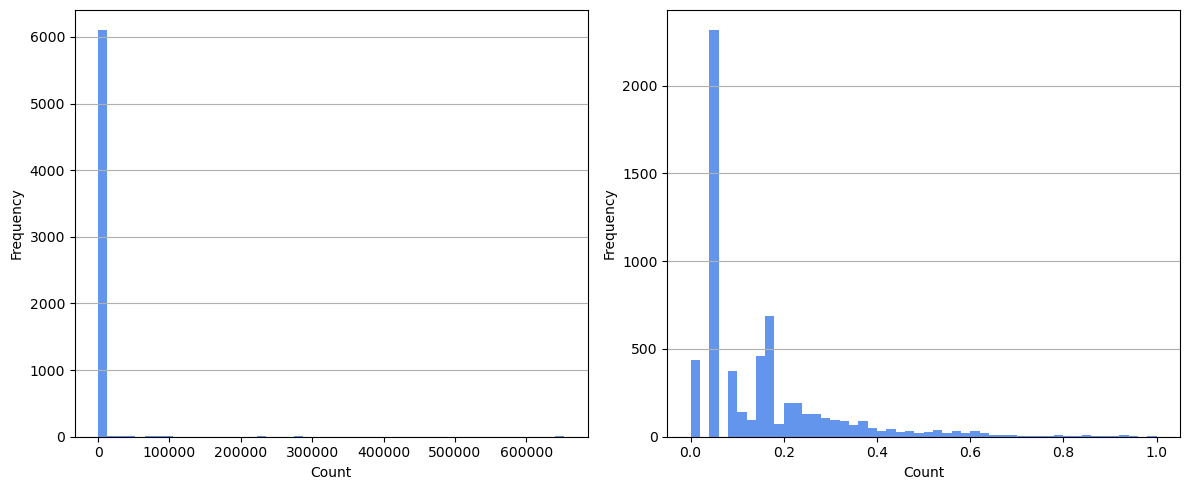

In [31]:
service_51['lin_score_c'] = service_51['count']
service_51['log_score_c'] = (np.log1p(service_51['count']) - service_51['count'].min()) / (np.log1p(max_count) - service_51['count'].min())

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Linear score histogram
axes[0].hist(service_51['lin_score_c'], bins=50, color='cornflowerblue')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y')  

# Log score histogram
axes[1].hist(service_51['log_score_c'], bins=50, color='cornflowerblue')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y')  

plt.tight_layout()
plt.show()

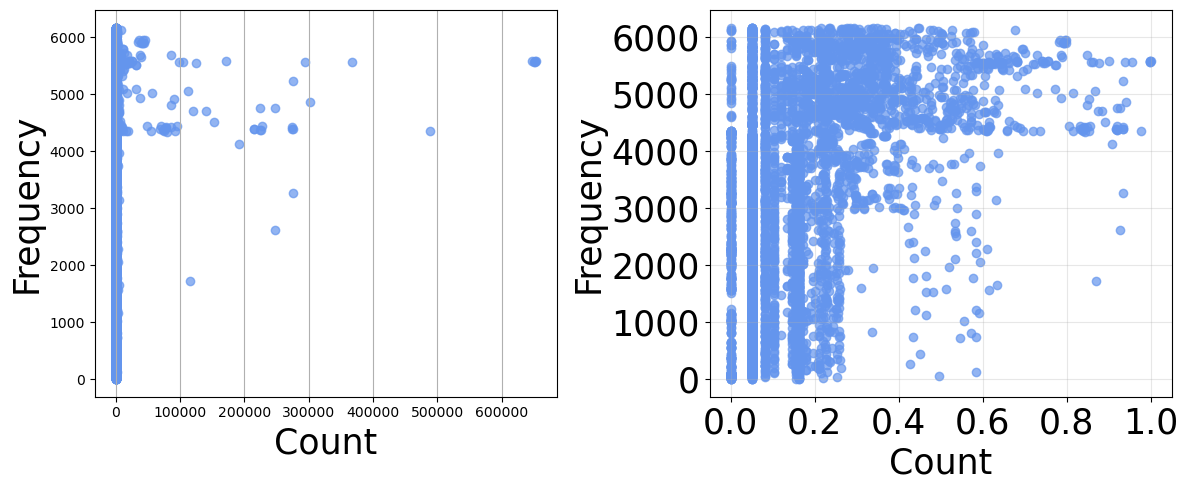

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(service_51['lin_score_c'], service_51.index, alpha=0.7, color='cornflowerblue')
axes[0].set_xlabel('Count', fontsize=25)
axes[0].set_ylabel('Frequency', fontsize=25)
axes[0].grid(axis='x')

axes[1].scatter(service_51['log_score_c'], service_51.index, alpha=0.7, color='cornflowerblue')
axes[1].set_xlabel('Count', fontsize=25)
axes[1].set_ylabel('Frequency', fontsize=25)
axes[1].grid(axis='x')

plt.grid(True, linestyle='-', alpha=0.3)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.tight_layout()
plt.show()

# **Directed graph**

In [33]:
G_51 = nx.DiGraph()

for _, row in service_51.iterrows():
    source = row['source_asset_id']
    target = row['target_asset_id']
    count = row['count']
    bytes_transferred = row['bytes']
    
    G_51.add_edge(
        source,
        target,
        count=count,
        bytes=bytes_transferred,
        relationship_id=row['relationship_id']
    )


In [35]:
print("Number of nodes:", G_51.number_of_nodes())
print("Number of edges:", G_51.number_of_edges())

Number of nodes: 327
Number of edges: 2158


In [38]:
edge_data_51 = [
    {
        'source': u,
        'target': v,
        'count': data.get('count', 0),
        'bytes': data.get('bytes', 0),
        'relationship_id': data.get('relationship_id', None)
    }
    for u, v, data in G_51.edges(data=True)
]
edges_51 = pd.DataFrame(edge_data_51)
edges_51.head(5)

source                                target  \
0  e83e87cb-1fc9-451a-a600-60f71eafff6b  551b1bd7-facb-4384-9b42-addd9a63c04e   
1  e83e87cb-1fc9-451a-a600-60f71eafff6b  2833fccb-5df7-45a0-b4ce-99c086af9333   
2  e83e87cb-1fc9-451a-a600-60f71eafff6b  3a606798-de39-46a6-bdd7-4e02547c379c   
3  e83e87cb-1fc9-451a-a600-60f71eafff6b  63d521e2-dd98-4763-b715-8f37391c2a3e   
4  e83e87cb-1fc9-451a-a600-60f71eafff6b  ca3de955-4e6a-40b2-b9e5-a57924adb009   

   count     bytes                       relationship_id  
0    505    181530  42f94dfc-62ec-4164-962b-f6fb1c302aa9  
1      2       172  952cfd3d-de4a-445f-8e9f-fb6623cd68fe  
2  85304  24433918  20bf0fb5-92b6-4db8-834f-c18d9b4fe8f6  
3      2       188  59ea151e-9ebc-4fbc-ab91-c8456040d8de  
4      1        94  cf9c72f4-c166-4a84-8a6a-45293d4e69ad

In [39]:
edges_51 = edges_51.merge(
    asset_merged[['id', 'category']],
    how='left',
    left_on='source',
    right_on='id'
).drop(columns=['id'])

edges_51 = edges_51.merge(
    asset_merged[['id', 'category']],  
    how='left',
    left_on='target',  
    right_on='id'
).drop(columns=['id']) 

edges_51 = edges_51.rename(columns={
    'category_x': 'source_type',  
    'category_y': 'target_type'   
})

edges_51.head(5)

source                                target  \
0  e83e87cb-1fc9-451a-a600-60f71eafff6b  551b1bd7-facb-4384-9b42-addd9a63c04e   
1  e83e87cb-1fc9-451a-a600-60f71eafff6b  2833fccb-5df7-45a0-b4ce-99c086af9333   
2  e83e87cb-1fc9-451a-a600-60f71eafff6b  3a606798-de39-46a6-bdd7-4e02547c379c   
3  e83e87cb-1fc9-451a-a600-60f71eafff6b  63d521e2-dd98-4763-b715-8f37391c2a3e   
4  e83e87cb-1fc9-451a-a600-60f71eafff6b  ca3de955-4e6a-40b2-b9e5-a57924adb009   

   count     bytes                       relationship_id source_type  \
0    505    181530  42f94dfc-62ec-4164-962b-f6fb1c302aa9       Other   
1      2       172  952cfd3d-de4a-445f-8e9f-fb6623cd68fe       Other   
2  85304  24433918  20bf0fb5-92b6-4db8-834f-c18d9b4fe8f6       Other   
3      2       188  59ea151e-9ebc-4fbc-ab91-c8456040d8de       Other   
4      1        94  cf9c72f4-c166-4a84-8a6a-45293d4e69ad       Other   

  target_type  
0       Other  
1          IT  
2          OT  
3     Network  
4     Network

Indegree and Outdegree based on category

In [40]:
indegree_51 = dict(G_51.in_degree())
outdegree_51 = dict(G_51.out_degree())

nodes_51 = pd.DataFrame({
    'node': list(G_51.nodes()),
    'in_degree': [indegree_51.get(node, 0) for node in G_51.nodes()],
    'out_degree': [outdegree_51.get(node, 0) for node in G_51.nodes()]
})
nodes_51['degree_total'] = nodes_51['in_degree'] + nodes_51['out_degree']

nodes_51 = nodes_51.merge(
    asset_merged[['id', 'category']],
    how='left',
    left_on='node',
    right_on='id'
).drop(columns=['id'])

nodes_51.sort_values(by=['in_degree', 'out_degree'], ascending=False)

node  in_degree  out_degree  \
37   acc3f027-7543-485d-9704-8debaa2f9f60         92          94   
2    e56f6f40-5645-4f7c-bea2-fd8a3f415fdc         77          82   
85   f1fb377e-31ff-48fb-84de-a2018d498aaa         63          64   
82   81c9237c-a4be-4579-8205-f3944a02771b         58          58   
5    38591192-aa42-4329-9013-1f42744cb75a         56          58   
..                                    ...        ...         ...   
270  ce983d6d-e331-4a53-9f3a-15c03e95a3b8          0           1   
288  2f33b10d-9d3c-462c-a659-8143e291c4a9          0           1   
307  c850cacc-cdf2-48b4-bf9d-814bc41fb67a          0           1   
322  899713d8-9a57-4b2d-9aa3-de29ee5294ef          0           1   
324  b0c61cab-01bf-44f1-8a92-1d5acf98c01c          0           1   

     degree_total       category  
37            186            IoT  
2             159            IoT  
85            127            IoT  
82            116        Network  
5             114            IoT  
..            ...            ...  
270             1            IoT  
288             1            IoT  
307             1            IoT  
322             1            IoT  
324             1  Uncategorized  

[327 rows x 5 columns]

In [42]:
avg_deg_by_type = (
    nodes_51
      .groupby('category')[['in_degree','out_degree', 'degree_total']]
      .mean()
      .rename(columns={
          'in_degree':  'avg_in_degree',
          'out_degree': 'avg_out_degree',
          'degree_total':  'avg_total_degree'
      })
)
avg_deg_by_type.sort_values(by='avg_total_degree', ascending = False).round(2)

avg_in_degree  avg_out_degree  avg_total_degree
category                                                      
IoT                    17.24           18.24             35.48
Other                   6.71            6.30             13.02
Network                 6.57            5.56             12.13
IT                      4.58            7.42             12.00
Uncategorized           3.86            3.29              7.14
OT                      3.38            3.33              6.71

# **External-attack probability p_j**

**Connectivity risk**

In [21]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G_51)
# Calculate betweennss centrality
betweenness_centrality = nx.betweenness_centrality(G_51)
# Calculate betweennss centrality
closeness_centrality = nx.closeness_centrality(G_51)

In [22]:
nodes_51['degree_centrality'] = nodes_51['node'].map(degree_centrality)
nodes_51['betweenness_centrality'] = nodes_51['node'].map(betweenness_centrality)
nodes_51['closeness_centrality'] = nodes_51['node'].map(closeness_centrality)
alpha, beta, delta = 0.4, 0.4, 0.2

nodes_51['connectivity_risk'] = (
    alpha * nodes_51['degree_centrality'] +
    beta  * nodes_51['betweenness_centrality'] +
    delta * nodes_51['closeness_centrality']
)

#Min–max normalize connectivity_risk to [0,1]
cr_min = nodes_51['connectivity_risk'].min()
cr_max = nodes_51['connectivity_risk'].max()
nodes_51['connectivity_risk'] = (
    (nodes_51['connectivity_risk'] - cr_min) /
    (cr_max - cr_min)
).fillna(0)

nodes_51[['node','degree_centrality','betweenness_centrality','closeness_centrality','connectivity_risk']].sort_values(ascending=False, by='connectivity_risk')

node  degree_centrality  \
37   acc3f027-7543-485d-9704-8debaa2f9f60           0.570552   
2    e56f6f40-5645-4f7c-bea2-fd8a3f415fdc           0.487730   
85   f1fb377e-31ff-48fb-84de-a2018d498aaa           0.389571   
82   81c9237c-a4be-4579-8205-f3944a02771b           0.355828   
64   90fda701-b295-49c2-b0d6-a9324337dd57           0.346626   
..                                    ...                ...   
307  c850cacc-cdf2-48b4-bf9d-814bc41fb67a           0.003067   
322  899713d8-9a57-4b2d-9aa3-de29ee5294ef           0.003067   
288  2f33b10d-9d3c-462c-a659-8143e291c4a9           0.003067   
261  084c2974-7e63-4f02-a829-50ed7686413a           0.003067   
270  ce983d6d-e331-4a53-9f3a-15c03e95a3b8           0.003067   

     betweenness_centrality  closeness_centrality  connectivity_risk  
37                 0.223757              0.439372           1.000000  
2                  0.168155              0.414701           0.850870  
85                 0.083127              0.398710           0.661754  
82                 0.112291              0.382486           0.649201  
64                 0.097880              0.380143           0.624684  
..                      ...                   ...                ...  
307                0.000000              0.000000           0.000000  
322                0.000000              0.000000           0.000000  
288                0.000000              0.000000           0.000000  
261                0.000000              0.000000           0.000000  
270                0.000000              0.000000           0.000000  

[327 rows x 5 columns]

In [23]:
nodes_51.sort_values(by='connectivity_risk', ascending=False).tail(10)

node  in_degree  out_degree  \
78   5bc073a4-3da1-4f45-8e74-34de52b1cdf9          0          15   
107  f2a57c02-7ce7-4a87-92b7-41cb6c59e0e5          0          14   
113  f23b0ab4-3f0d-452b-9d26-13dfbb57db9b          0          14   
312  169443b7-f7fa-4890-97a2-1dc5fa5d8ea0          0           3   
324  b0c61cab-01bf-44f1-8a92-1d5acf98c01c          0           1   
307  c850cacc-cdf2-48b4-bf9d-814bc41fb67a          0           1   
322  899713d8-9a57-4b2d-9aa3-de29ee5294ef          0           1   
288  2f33b10d-9d3c-462c-a659-8143e291c4a9          0           1   
261  084c2974-7e63-4f02-a829-50ed7686413a          0           1   
270  ce983d6d-e331-4a53-9f3a-15c03e95a3b8          0           1   

          category  degree_total  degree_centrality  betweenness_centrality  \
78              IT            15           0.046012                     0.0   
107             IT            14           0.042945                     0.0   
113             IT            14           0.042945                     0.0   
312            IoT             3           0.009202                     0.0   
324  Uncategorized             1           0.003067                     0.0   
307            IoT             1           0.003067                     0.0   
322            IoT             1           0.003067                     0.0   
288            IoT             1           0.003067                     0.0   
261            IoT             1           0.003067                     0.0   
270            IoT             1           0.003067                     0.0   

     closeness_centrality  connectivity_risk  
78                    0.0           0.042481  
107                   0.0           0.039446  
113                   0.0           0.039446  
312                   0.0           0.006069  
324                   0.0           0.000000  
307                   0.0           0.000000  
322                   0.0           0.000000  
288                   0.0           0.000000  
261                   0.0           0.000000  
270                   0.0           0.000000

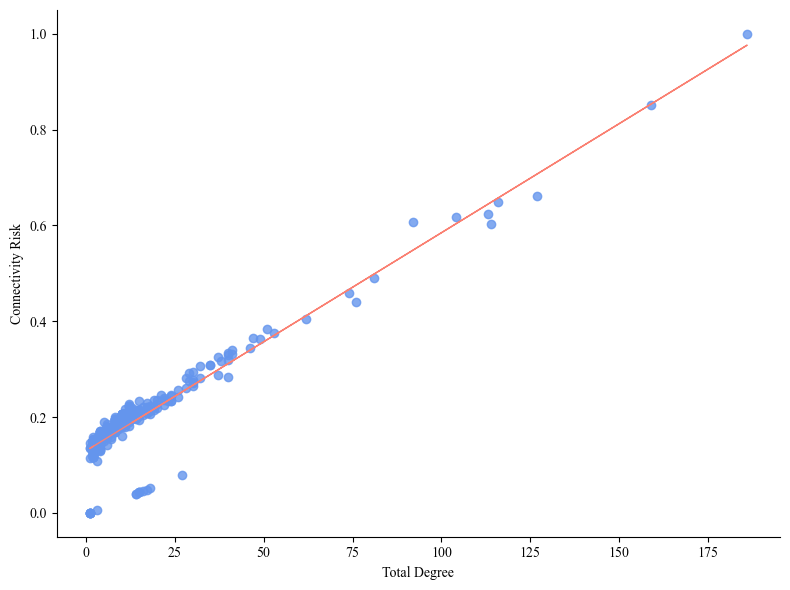

In [103]:
# Plot
x = nodes_51['degree_total']
y = nodes_51['connectivity_risk']

slope, intercept = np.polyfit(x, y, 1)
line = slope * x + intercept

plt.figure(figsize=(8, 6))
plt.scatter(nodes_51['degree_total'], nodes_51['connectivity_risk'], alpha=0.8, color='cornflowerblue')
plt.plot(x, line, color='salmon', linewidth=1, label='Fitted Line')
plt.xlabel('Total Degree')
plt.ylabel('Connectivity Risk')
plt.grid(False)
plt.tight_layout()
plt.show()

In [25]:
nodes_51.groupby('category')[['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'connectivity_risk']].mean().sort_values(by='connectivity_risk', ascending=False)

degree_centrality  betweenness_centrality  \
category                                                   
IoT                     0.108823                0.030994   
Network                 0.037223                0.004899   
Other                   0.039932                0.004742   
Uncategorized           0.021911                0.002201   
IT                      0.036810                0.002951   
OT                      0.020596                0.007758   

               closeness_centrality  connectivity_risk  
category                                                
IoT                        0.224293           0.246205  
Network                    0.318285           0.196055  
Other                      0.310247           0.194604  
Uncategorized              0.300664           0.169523  
IT                         0.261514           0.165640  
OT                         0.259816           0.153517

**Asset based risk**

In [26]:
# Step 1: Compute mean connectivity risk per category
mean_risk = (
    nodes_51
    .groupby('category')['connectivity_risk']
    .mean()
)

# Step 2: Sort categories by average risk (ascending)
sorted_cats = mean_risk.sort_values(ascending=False).index.tolist()

# Step 3: Force 'OT' to top of the list (always highest baseline)
if 'OT' in sorted_cats:
    sorted_cats.remove('OT')
sorted_cats = ['OT'] + sorted_cats  # OT always first

# Step 4: Assign linearly spaced base values from 0.08 to 0.02
base_max = 0.08
base_min = 0.02
n = len(sorted_cats)
step = (base_max - base_min) / (n - 1) if n > 1 else 0

category_base = {
    cat: base_max - i * step
    for i, cat in enumerate(sorted_cats)
}


In [27]:
category_base

{'OT': 0.08,
 'IoT': 0.068,
 'Network': 0.056,
 'Other': 0.044,
 'Uncategorized': 0.032,
 'IT': 0.020000000000000004}

In [34]:
df_pj = nodes_51.copy()

df_pj['cat_mean_risk'] = df_pj['category'].map(mean_risk)
df_pj['base_c'] = df_pj['category'].map(category_base)

df_pj['p_j'] = df_pj.apply(
    #if conn_risk == cat_mean → no change; if higher → proportionally higher)
    lambda row: min(1.0, row['base_c'] * (row['connectivity_risk'] / row['cat_mean_risk']))
    if row['cat_mean_risk'] > 0 else row['base_c'],
    axis=1
)

p_j = df_pj[['node', 'connectivity_risk', 'cat_mean_risk', 'base_c', 'p_j']]
p_j

node  connectivity_risk  cat_mean_risk  \
0    e83e87cb-1fc9-451a-a600-60f71eafff6b           0.210283       0.194604   
1    551b1bd7-facb-4384-9b42-addd9a63c04e           0.292193       0.194604   
2    e56f6f40-5645-4f7c-bea2-fd8a3f415fdc           0.850870       0.246205   
3    a5445053-6b28-450b-9e2d-886b0cb2e7b7           0.206444       0.196055   
4    a6fb3808-fade-4e11-9cf0-547f94ebf601           0.330946       0.196055   
..                                    ...                ...            ...   
322  899713d8-9a57-4b2d-9aa3-de29ee5294ef           0.000000       0.246205   
323  610674b1-bbf5-4bc6-a94e-be05160a2953           0.186814       0.169523   
324  b0c61cab-01bf-44f1-8a92-1d5acf98c01c           0.000000       0.169523   
325  19f1cf0c-d86f-4dbf-9ea5-1951eece47d8           0.115679       0.165640   
326  d07f045c-3595-4821-955f-d83c508c0217           0.115679       0.194604   

     base_c       p_j  
0     0.044  0.047545  
1     0.044  0.066065  
2     0.068  0.235004  
3     0.056  0.058968  
4     0.056  0.094530  
..      ...       ...  
322   0.068  0.000000  
323   0.032  0.035264  
324   0.032  0.000000  
325   0.020  0.013967  
326   0.044  0.026155  

[327 rows x 5 columns]

In [164]:
p_j_category = p_j.merge(
    asset_merged[['id', 'category']],
    left_on='node',
    right_on='id',
    how='left',
    suffixes=('', '_type')
)
p_j_category['category'] = p_j_category['category'].fillna('Uncategorized')
p_j_category.sort_values(by='p_j', ascending=False).head(10)

node  connectivity_risk  cat_mean_risk  \
8    3a606798-de39-46a6-bdd7-4e02547c379c           0.608249       0.153517   
37   acc3f027-7543-485d-9704-8debaa2f9f60           1.000000       0.246205   
2    e56f6f40-5645-4f7c-bea2-fd8a3f415fdc           0.850870       0.246205   
82   81c9237c-a4be-4579-8205-f3944a02771b           0.649201       0.196055   
85   f1fb377e-31ff-48fb-84de-a2018d498aaa           0.661754       0.246205   
232  452d22f7-0894-405f-b689-cdc0ae748453           0.617157       0.196055   
64   90fda701-b295-49c2-b0d6-a9324337dd57           0.624684       0.246205   
5    38591192-aa42-4329-9013-1f42744cb75a           0.602732       0.246205   
30   4f2e8737-8795-4252-b70a-fbfb0ed828a1           0.490789       0.196055   
28   63922795-15e0-44a4-a375-60eb49ff103c           0.458528       0.196055   

     base_c       p_j                                    id category  
8     0.080  0.316967  3a606798-de39-46a6-bdd7-4e02547c379c       OT  
37    0.068  0.276193  acc3f027-7543-485d-9704-8debaa2f9f60      IoT  
2     0.068  0.235004  e56f6f40-5645-4f7c-bea2-fd8a3f415fdc      IoT  
82    0.056  0.185434  81c9237c-a4be-4579-8205-f3944a02771b  Network  
85    0.068  0.182772  f1fb377e-31ff-48fb-84de-a2018d498aaa      IoT  
232   0.056  0.176281  452d22f7-0894-405f-b689-cdc0ae748453  Network  
64    0.068  0.172533  90fda701-b295-49c2-b0d6-a9324337dd57      IoT  
5     0.068  0.166470  38591192-aa42-4329-9013-1f42744cb75a      IoT  
30    0.056  0.140186  4f2e8737-8795-4252-b70a-fbfb0ed828a1  Network  
28    0.056  0.130972  63922795-15e0-44a4-a375-60eb49ff103c  Network

In [267]:
p_j_category.describe().style.format({
    "connectivity_risk": "{:.2f}",
    "cat_mean_risk": "{:.2f}",
    "p_j": "{:.2f}"
})

In [582]:
p_j_category.groupby('category').describe()

connectivity_risk                                          \
                          count      mean       std       min       25%   
category                                                                  
IT                         59.0  0.165640  0.068270  0.039446  0.139046   
IoT                        21.0  0.246205  0.304053  0.000000  0.006069   
Network                   156.0  0.196055  0.085191  0.116261  0.149593   
OT                         21.0  0.153517  0.104203  0.129411  0.129411   
Other                      56.0  0.194604  0.054482  0.114486  0.151125   
Uncategorized              14.0  0.169523  0.057512  0.000000  0.159625   

                                            cat_mean_risk            ...  \
                    50%       75%       max         count      mean  ...   
category                                                             ...   
IT             0.162934  0.209949  0.334602          59.0  0.165640  ...   
IoT            0.137874  0.178104  1.000000          21.0  0.246205  ...   
Network        0.168594  0.206444  0.649201         156.0  0.196055  ...   
OT             0.129411  0.132454  0.608249          21.0  0.153517  ...   
Other          0.189960  0.220805  0.375057          56.0  0.194604  ...   
Uncategorized  0.183466  0.196624  0.245101          14.0  0.169523  ...   

              base_c           p_j                                       \
                 75%    max  count   mean       std       min       25%   
category                                                                  
IT             0.020  0.020   59.0  0.020  0.008243  0.004763  0.016789   
IoT            0.068  0.068   21.0  0.068  0.083977  0.000000  0.001676   
Network        0.056  0.056  156.0  0.056  0.024333  0.033208  0.042729   
OT             0.080  0.080   21.0  0.080  0.054302  0.067438  0.067438   
Other          0.044  0.044   56.0  0.044  0.012318  0.025885  0.034169   
Uncategorized  0.032  0.032   14.0  0.032  0.010856  0.000000  0.030132   

                                             
                    50%       75%       max  
category                                     
IT             0.019673  0.025350  0.040401  
IoT            0.038080  0.049191  0.276193  
Network        0.048156  0.058968  0.185434  
OT             0.067438  0.069024  0.316967  
Other          0.042950  0.049924  0.084801  
Uncategorized  0.034632  0.037116  0.046266  

[6 rows x 32 columns]

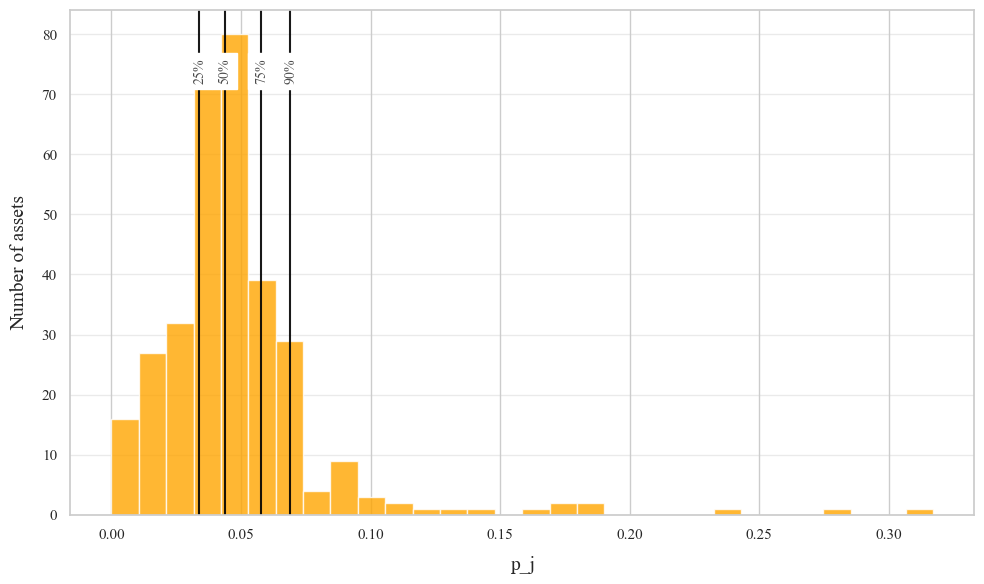

In [268]:
percentiles = [25, 50, 75, 90]
perc_values = np.percentile(p_j_category['p_j'], percentiles)

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(
    p_j_category['p_j'],
    bins=30,
    edgecolor='white',
    color='orange', 
    alpha=0.8  
)
plt.grid(axis='y', linestyle='-', alpha=0.4)
y_max = n.max()
for p, val in zip(percentiles, perc_values):
    plt.axvline(
        x=val,
        color='black',
        linestyle='-',
        linewidth=1.5,
        alpha=0.9
    )
    plt.text(
        val,
        y_max * 0.95,
        f"{p}%",
        rotation=90,
        color='black',
        fontsize=10,
        ha='center',
        va='top',
        backgroundcolor='white',
        alpha=0.7
    )

plt.xlabel("p_j", fontsize=14, labelpad=10)
plt.ylabel("Number of assets", fontsize=14, labelpad=10)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

plt.show()

/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

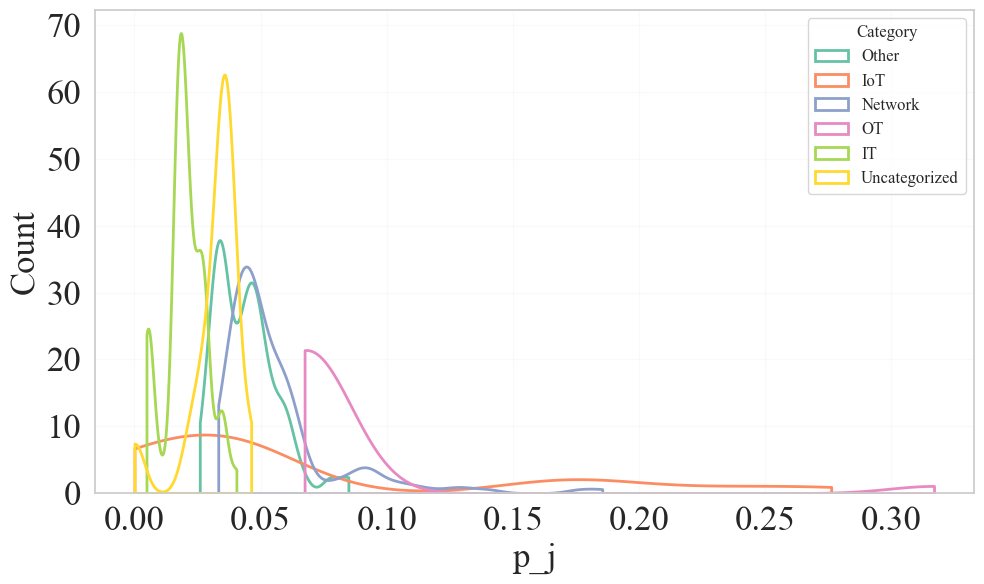

In [ ]:
categories = p_j_category['category'].unique()
palette = dict(zip(categories, sns.color_palette("Set2", len(categories))))

plt.figure(figsize=(10, 6))

# Plot KDE for each category
for cat in categories:
    subset = p_j_category[p_j_category['category'] == cat]
    sns.kdeplot(
        data=subset,
        x='p_j',
        fill=True,
        label=cat,
        alpha=0,
        linewidth=2,
        color=palette[cat],
        clip=(0, 1),     # Ensure p_j stays within [0, 1]
        cut=0,           # Prevent extension beyond data range
        bw_adjust=0.6    # Optional: adjust smoothness
    )

# Labels and styling
plt.xlabel("p_j", fontsize=25)
plt.ylabel("Count", fontsize=25)
plt.legend(title="Category", fontsize=12, title_fontsize=12)
plt.grid(True, linestyle='-', alpha=0.1)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.show()


/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

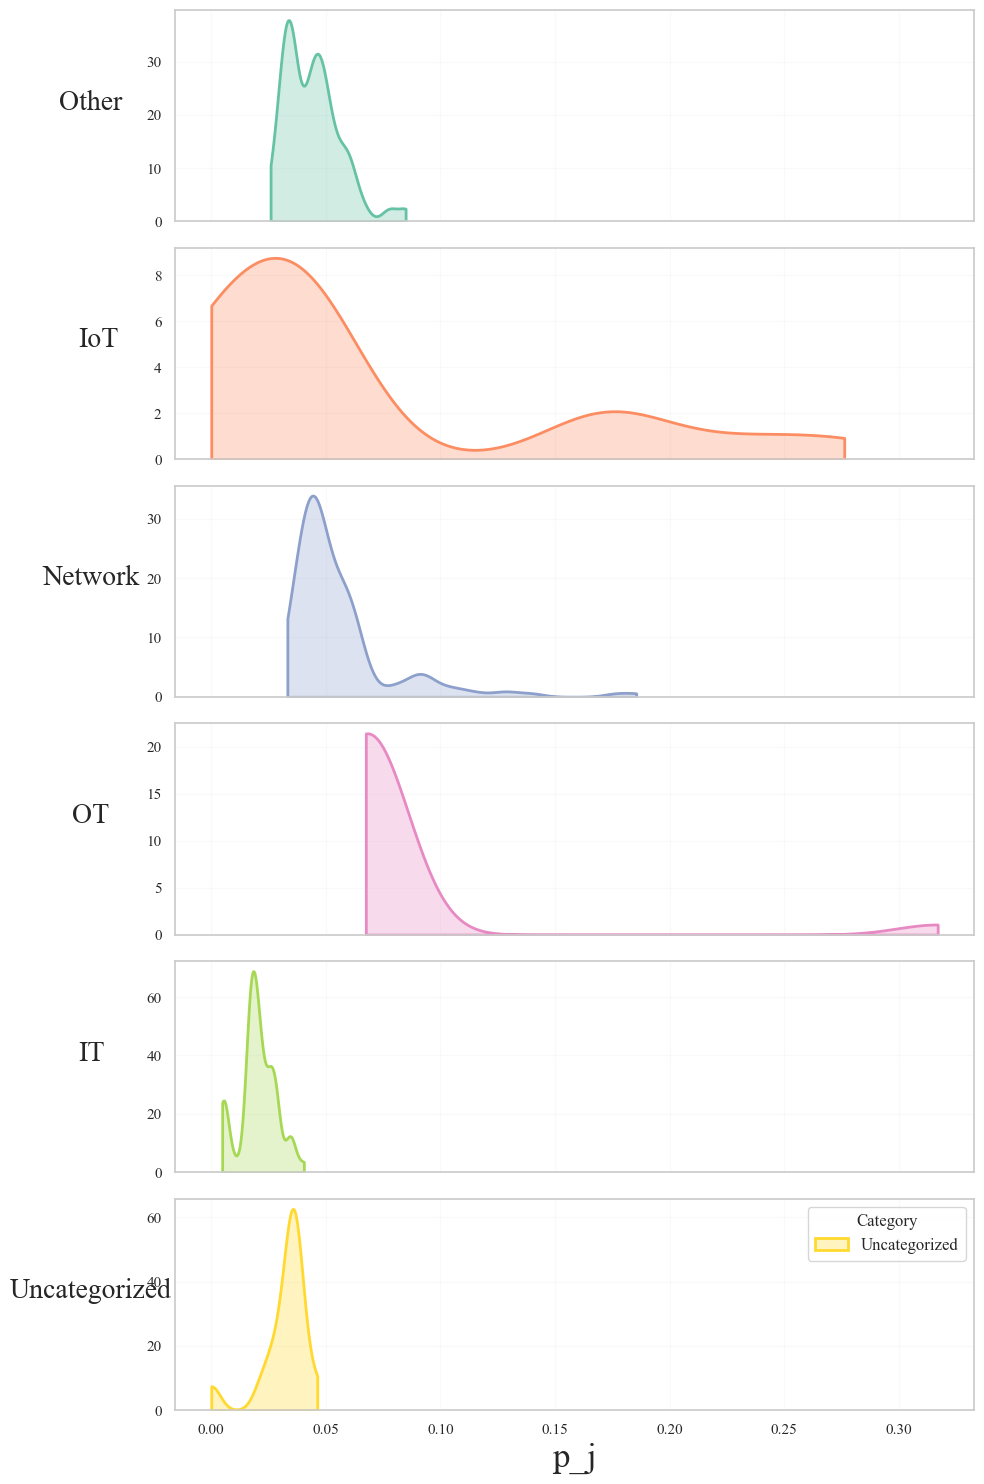

In [ ]:
cats = p_j_category['category'].unique()
palette = dict(zip(cats, sns.color_palette("Set2", len(cats))))

# make one row per category, sharing the x-axis
fig, axes = plt.subplots(len(cats), 1, sharex=True, figsize=(10, 2.5*len(cats)))

for ax, cat in zip(axes, cats):
    subset = p_j_category[p_j_category['category'] == cat]
    sns.kdeplot(
        data=subset,
        x='p_j',
        fill=True,
        label=cat,
        alpha=0.3,
        linewidth=2,
        color=palette[cat],
        clip=(0,1),
        cut=0,
        bw_adjust=0.6,
        ax=ax
    )
    ax.set_ylabel(cat, rotation=0, labelpad=40, fontsize=20)
    ax.legend().remove()
    ax.grid(True, linestyle='-', alpha=0.1)

# only bottom Axes gets an x‐label and ticks
axes[-1].set_xlabel("p_j", fontsize=25)
axes[-1].legend(title="Category", fontsize=12, title_fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()


# **Internal-exploit probability p_ij**

Build edge metrics lookup, normalizing count & bytes to derive p_edge

In [ ]:
# Log-normalize 'count' and 'bytes' columns
max_count = edges_51['count'].max() or 1
max_bytes = edges_51['bytes'].max() or 1

edges_51['norm_cnt'] = np.log1p(edges_51['count']) / np.log1p(max_count)
edges_51['norm_byt'] = np.log1p(edges_51['bytes']) / np.log1p(max_bytes)

# Tunable parameters
p0 = 0.05                     # baseline risk
alpha_beta_sum = 0.95
alpha = (4 / 7) * alpha_beta_sum   # 4:3 ratio
beta = (3 / 7) * alpha_beta_sum

edges_51['p_ij'] = (
    p0
    + alpha * edges_51['norm_cnt']
    + beta  * edges_51['norm_byt']
).clip(upper=1.0)  # Ensure it's within [0,1]

p_ij = {
    (row.source, row.target): {
        'p_ij': row.p_ij,
        'count': row['count'],
        'bytes': row['bytes']
    }
    for _, row in edges_51.iterrows()
}

In [297]:
df_p_ij = pd.DataFrame([
    {
        'source': src,
        'target': tgt,
        'p_ij': vals['p_ij'],
        'count':  vals.get('count', 0),
        'bytes':  vals.get('bytes', 0),
    }
    for (src, tgt), vals in p_ij.items()
])

df_p_ij.sort_values('p_ij', ascending=False)

source  \
231   4661e01a-3521-4a40-be48-dbb58467947b   
829   45a987c3-4be4-418c-a748-b8db9a48c8c3   
233   4661e01a-3521-4a40-be48-dbb58467947b   
235   4661e01a-3521-4a40-be48-dbb58467947b   
241   bb51e61f-1e28-4d17-b94d-f60e7ce040d0   
...                                    ...   
1424  a2334788-7748-4d04-ade8-4dfa6c1b976d   
1426  a2334788-7748-4d04-ade8-4dfa6c1b976d   
630   a4563d51-a615-42ff-8af5-80669a7403cd   
1447  f5acf83d-ed9b-4033-a415-40d4a83465e4   
1079  0b52145f-df4a-4dcc-a015-07b811ad5a37   

                                    target      p_ij   count      bytes  
231   90fda701-b295-49c2-b0d6-a9324337dd57  0.976634  366910  504890772  
829   3a606798-de39-46a6-bdd7-4e02547c379c  0.969100  488130  197119027  
233   acc3f027-7543-485d-9704-8debaa2f9f60  0.965114  302136  421964570  
235   f1fb377e-31ff-48fb-84de-a2018d498aaa  0.962430  293835  390889847  
241   3a606798-de39-46a6-bdd7-4e02547c379c  0.952525  652893   48792077  
...                                    ...       ...     ...        ...  
1424  63922795-15e0-44a4-a375-60eb49ff103c  0.050000       0          0  
1426  1c825404-a7a0-4f40-bf82-498bbada9f07  0.050000       0          0  
630   ed28044c-3fa2-4972-8683-353de771311f  0.050000       0          0  
1447  5c18c3e7-2ede-4df5-b4e8-0da9e2bdf54a  0.050000       0          0  
1079  8fb92898-5514-4851-9fe1-faeeef46f392  0.050000       0          0  

[2158 rows x 5 columns]

In [306]:
edges_51.sort_values(by='p_ij', ascending=False).head(10)


source  \
231   4661e01a-3521-4a40-be48-dbb58467947b   
829   45a987c3-4be4-418c-a748-b8db9a48c8c3   
233   4661e01a-3521-4a40-be48-dbb58467947b   
235   4661e01a-3521-4a40-be48-dbb58467947b   
241   bb51e61f-1e28-4d17-b94d-f60e7ce040d0   
1793  7dc4f278-bcce-484d-8a07-f3656f795be7   
1716  dbfa7760-25ec-4147-b737-32e9b8749fe5   
949   aedc6d04-e23f-4732-8927-73b4d8785314   
1614  ef4f0225-067b-4d54-80e5-1073bec37c73   
232   4661e01a-3521-4a40-be48-dbb58467947b   

                                    target   count      bytes  \
231   90fda701-b295-49c2-b0d6-a9324337dd57  366910  504890772   
829   3a606798-de39-46a6-bdd7-4e02547c379c  488130  197119027   
233   acc3f027-7543-485d-9704-8debaa2f9f60  302136  421964570   
235   f1fb377e-31ff-48fb-84de-a2018d498aaa  293835  390889847   
241   3a606798-de39-46a6-bdd7-4e02547c379c  652893   48792077   
1793  3a606798-de39-46a6-bdd7-4e02547c379c  651897   48717784   
1716  3a606798-de39-46a6-bdd7-4e02547c379c  651271   48670863   
949   3a606798-de39-46a6-bdd7-4e02547c379c  650184   48588890   
1614  3a606798-de39-46a6-bdd7-4e02547c379c  647339   48375760   
232   38591192-aa42-4329-9013-1f42744cb75a  227689  321738758   

                           relationship_id source_type target_type  norm_cnt  \
231   eaab3c11-0df2-481d-a378-ee8465556e19     Network         IoT  0.956958   
829   3b162325-e05d-4abe-805a-9e22e9d48d78          IT          OT  0.978279   
233   76888c06-187e-4c15-81e9-e4ceeb3781e8     Network         IoT  0.942451   
235   a23e1281-22e9-465e-817e-6ed5babcbffa     Network         IoT  0.940370   
241   627ce807-a245-4bd3-98c6-4ad824300401          OT          OT  1.000000   
1793  10c66036-6513-4df7-82d6-288d40feae88          OT          OT  0.999886   
1716  e4f591f7-e7db-404e-b435-c4c2293773f3          OT          OT  0.999814   
949   2b945821-0e28-4a1e-82fc-ba92b0c03c71          OT          OT  0.999689   
1614  1f647250-9874-4d26-9be4-6ce2c29bbc33          OT          OT  0.999362   
232   5b2211d0-ae03-4c98-b506-9b10233bfb55     Network         IoT  0.921322   

      norm_byt      p_ij  
231   1.000000  0.976634  
829   0.953067  0.969100  
233   0.991047  0.965114  
235   0.987230  0.962430  
241   0.883394  0.952525  
1793  0.883318  0.952432  
1716  0.883270  0.952373  
949   0.883185  0.952271  
1614  0.882966  0.952004  
232   0.977515  0.948134

High-risk edges

In [ ]:
# Filter for high-risk internal exploit edges
high_risk_edges = edges_51[edges_51['p_ij'] > 0.75]

# Find most common source and target
most_common_source = high_risk_edges['source'].value_counts().idxmax()
most_common_target = high_risk_edges['target'].value_counts().idxmax()

source_counts = high_risk_edges['source'].value_counts()
target_counts = high_risk_edges['target'].value_counts()

print("Most frequent source (p_ij > 0.75):", most_common_source)
print("Occurrences:", source_counts[most_common_source])
print("\nMost frequent target (p_ij > 0.75):", most_common_target)
print("Occurrences:", target_counts[most_common_target])


Most frequent source (p_ij > 0.75): 452d22f7-0894-405f-b689-cdc0ae748453
Occurrences: 9

Most frequent target (p_ij > 0.75): 3a606798-de39-46a6-bdd7-4e02547c379c
Occurrences: 39


In [437]:
high_risk_edges

source  \
2     e83e87cb-1fc9-451a-a600-60f71eafff6b   
9     e56f6f40-5645-4f7c-bea2-fd8a3f415fdc   
76    e56f6f40-5645-4f7c-bea2-fd8a3f415fdc   
82    e56f6f40-5645-4f7c-bea2-fd8a3f415fdc   
142   38591192-aa42-4329-9013-1f42744cb75a   
...                                    ...   
1933  452d22f7-0894-405f-b689-cdc0ae748453   
1941  452d22f7-0894-405f-b689-cdc0ae748453   
1942  452d22f7-0894-405f-b689-cdc0ae748453   
1946  452d22f7-0894-405f-b689-cdc0ae748453   
1958  452d22f7-0894-405f-b689-cdc0ae748453   

                                    target  count     bytes  \
2     3a606798-de39-46a6-bdd7-4e02547c379c  85304  24433918   
9     4661e01a-3521-4a40-be48-dbb58467947b  37872  12826942   
76    452d22f7-0894-405f-b689-cdc0ae748453  44744   6275161   
82    a11c8ba4-b53d-4389-a020-8cb0c0f34cf2  41599   5773675   
142   4661e01a-3521-4a40-be48-dbb58467947b  49215  14821355   
...                                    ...    ...       ...   
1933  e56f6f40-5645-4f7c-bea2-fd8a3f415fdc  42985  25076149   
1941  38591192-aa42-4329-9013-1f42744cb75a  37484  21240297   
1942  3521f0d3-3827-4876-ab23-fc8634ae3d40  17501  18010207   
1946  d84478e3-ec75-427a-a219-2053c49ef78e  12127  13764946   
1958  acc3f027-7543-485d-9704-8debaa2f9f60  41454  24510934   

                           relationship_id source_type target_type  norm_cnt  \
2     20bf0fb5-92b6-4db8-834f-c18d9b4fe8f6       Other          OT  0.847998   
9     8eb6f714-aa47-4313-9022-08ef5aba078a         IoT     Network  0.787352   
76    b5191278-8315-46fe-a6e9-7b07c3bb9822         IoT     Network  0.799806   
82    b4cfbae9-f55d-4d50-a72d-17c34e555310         IoT     Network  0.794363   
142   36f6da56-b508-447b-8fff-91670409f9e2         IoT     Network  0.806919   
...                                    ...         ...         ...       ...   
1933  c555798f-fd05-406f-bcbc-f79a67dec8d3     Network         IoT  0.796810   
1941  93fef5c1-d371-4b35-aa93-668970ba88da     Network         IoT  0.786583   
1942  3c1fce38-240d-41bf-a0ec-225b4fef76e9     Network          IT  0.729699   
1946  b4e3c65e-8410-4495-963d-4cc91bbac64c     Network          IT  0.702304   
1958  9464455e-806f-40ae-8ff2-1cdbf36758dc     Network         IoT  0.794102   

      norm_byt      p_ij  
2     0.848883  0.855958  
9     0.816725  0.809944  
76    0.781049  0.802179  
82    0.776893  0.797532  
142   0.823937  0.823502  
...        ...       ...  
1933  0.850177  0.828698  
1941  0.841893  0.819773  
1942  0.833661  0.785542  
1946  0.820247  0.765209  
1958  0.849040  0.826764  

[75 rows x 10 columns]

In [ ]:
total = len(high_risk_edges)

# Compute frequency of each category as source
source_counts = high_risk_edges['source_type'].value_counts(normalize=True) * 100

# Compute frequency of each category as target
target_counts = high_risk_edges['target_type'].value_counts(normalize=True) * 100

category_summary = pd.DataFrame({
    'category': sorted(set(source_counts.index).union(target_counts.index)),
    'source (%)': [source_counts.get(cat, 0) for cat in sorted(set(source_counts.index).union(target_counts.index))],
    'target (%)': [target_counts.get(cat, 0) for cat in sorted(set(source_counts.index).union(target_counts.index))]
})

category_summary = category_summary.round(2)
category_summary.sort_values(by='source (%)', ascending=False)


category  source (%)  target (%)
2  Network       28.00       20.00
3       OT       26.67       52.00
1      IoT       20.00       20.00
4    Other       17.33        1.33
0       IT        8.00        6.67

# **BAG** 

In [31]:
N = nodes_51['node'].tolist() #Node set N
T = {node: 'OR' for node in N} #Node types T: default to 'OR' for all nodes
and_nodes = []  
for node in and_nodes:
    if node in T:
        T[node] = 'AND'

E = list(p_ij.keys())

In [35]:
BAG = {
    'nodes': N,
    'types': T,
    'edges': E,
    'p_int': p_ij,
    'p_ext': p_j
}

In [36]:
from pgmpy.models import DiscreteBayesianNetwork as BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD
import itertools
from pgmpy.sampling import BayesianModelSampling

Build parent lists

In [37]:
nodes = nodes_51['node'].tolist()

parents = {j: [] for j in nodes}
for (i, j), val in p_ij.items():
    parents[j].append((i, val['p_ij']))

Run fixed‐point propagation to solve for all P_base

In [38]:
def compute_marginals(p_ext_map, parents, clamp=None, max_iter=200, tol=1e-6):
    """
    Fixed‐point solve for P_j = P(X_j=1).
    If clamp is given as {node: value}, those P[node] stay fixed each iteration.
    """
    clamp = clamp or {}
    # 1) Initialize P_j = leak_j (or clamped value if provided)
    P = {
        j: (clamp[j] if j in clamp else p_ext_map.get(j, 0.01))
        for j in parents
    }

    for _ in range(max_iter):
        P_new = P.copy()
        for j, preds in parents.items():
            if j in clamp:
                # keep the clamped value
                P_new[j] = clamp[j]
                continue

            # start with no‐compromise = (1 − external leak)
            p_no = 1 - p_ext_map.get(j, 0.0)
            # fold in each parent's contribution
            for i, rho_ij in preds:
                p_no *= (1 - rho_ij * P[i])
            P_new[j] = 1 - p_no

        # check convergence
        delta = max(abs(P_new[j] - P[j]) for j in P)
        P = P_new
        if delta < tol:
            break

    return P


In [430]:
parents = { j: [] for j in BAG['nodes'] }
# BAG['p_int'] is a dict with keys (i, j) and values like {'p_ij': ...}
for (i, j), val in BAG['p_int'].items():
    parents[j].append((i, val['p_ij']))

#run fixed‐point (no evidence → steady‐state compromise)
P_base_0 = compute_marginals(BAG['p_ext'], parents)
P_base_0_df = pd.DataFrame.from_dict(P_base_0, orient='index', columns=['P_base'])
P_base_0_df.sort_values(by='P_base', ascending=False).head(30)


P_base
acc3f027-7543-485d-9704-8debaa2f9f60  1.000000
f1fb377e-31ff-48fb-84de-a2018d498aaa  1.000000
452d22f7-0894-405f-b689-cdc0ae748453  1.000000
e56f6f40-5645-4f7c-bea2-fd8a3f415fdc  1.000000
90fda701-b295-49c2-b0d6-a9324337dd57  1.000000
38591192-aa42-4329-9013-1f42744cb75a  1.000000
3a606798-de39-46a6-bdd7-4e02547c379c  1.000000
4f2e8737-8795-4252-b70a-fbfb0ed828a1  1.000000
81c9237c-a4be-4579-8205-f3944a02771b  1.000000
25b16c6f-c7d1-4a42-9edb-7f127fe17fcd  1.000000
63922795-15e0-44a4-a375-60eb49ff103c  1.000000
1c825404-a7a0-4f40-bf82-498bbada9f07  1.000000
d84478e3-ec75-427a-a219-2053c49ef78e  0.999998
3521f0d3-3827-4876-ab23-fc8634ae3d40  0.999995
a62041bb-d64f-4eea-8cfb-ef0737669b22  0.999995
d8ed42f6-da21-4dd6-b19d-cc4c7e479bd6  0.999994
042db5c9-79ab-44bf-9e54-9bc54fd1badf  0.999992
4661e01a-3521-4a40-be48-dbb58467947b  0.999983
0b52145f-df4a-4dcc-a015-07b811ad5a37  0.999962
f5fd482a-794e-4a5f-aac3-f2754d231380  0.999899
6ff55d93-3105-413c-946a-6496ada898d3  0.999869
b17b2a31-70ea-4fed-ba36-04992a65ca58  0.999850
dc2f440a-e11a-4f76-b3f6-d162dd3cf2cb  0.999810
56089149-cf4f-412b-a42d-2fc052ef99f2  0.999797
a6fb3808-fade-4e11-9cf0-547f94ebf601  0.999756
eda0a7d1-6a6f-48db-90da-578fc6ba55b8  0.999716
8bf1fc05-b2aa-4bc9-90ab-0513e0af6ff1  0.999234
d5b7702a-4be1-40f2-bb6c-de9058f08974  0.999157
d880b642-e59b-4643-926f-7c5afc9f2c41  0.999150
4ae40eb6-5691-4de3-a127-7dc01835bd5e  0.999074

Propagation impact analysis

In [429]:
P_base = compute_marginals(p_j, parents)
P_base_df = pd.DataFrame.from_dict(P_base, orient='index', columns=['P_base'])
P_base_df.sort_values(by='P_base', ascending=False).head(30)

P_base
acc3f027-7543-485d-9704-8debaa2f9f60  1.000000
f1fb377e-31ff-48fb-84de-a2018d498aaa  1.000000
452d22f7-0894-405f-b689-cdc0ae748453  1.000000
e56f6f40-5645-4f7c-bea2-fd8a3f415fdc  1.000000
90fda701-b295-49c2-b0d6-a9324337dd57  1.000000
38591192-aa42-4329-9013-1f42744cb75a  1.000000
3a606798-de39-46a6-bdd7-4e02547c379c  1.000000
4f2e8737-8795-4252-b70a-fbfb0ed828a1  1.000000
81c9237c-a4be-4579-8205-f3944a02771b  1.000000
25b16c6f-c7d1-4a42-9edb-7f127fe17fcd  1.000000
63922795-15e0-44a4-a375-60eb49ff103c  1.000000
1c825404-a7a0-4f40-bf82-498bbada9f07  1.000000
d84478e3-ec75-427a-a219-2053c49ef78e  0.999998
3521f0d3-3827-4876-ab23-fc8634ae3d40  0.999995
a62041bb-d64f-4eea-8cfb-ef0737669b22  0.999995
d8ed42f6-da21-4dd6-b19d-cc4c7e479bd6  0.999994
042db5c9-79ab-44bf-9e54-9bc54fd1badf  0.999992
4661e01a-3521-4a40-be48-dbb58467947b  0.999983
0b52145f-df4a-4dcc-a015-07b811ad5a37  0.999962
f5fd482a-794e-4a5f-aac3-f2754d231380  0.999899
6ff55d93-3105-413c-946a-6496ada898d3  0.999869
b17b2a31-70ea-4fed-ba36-04992a65ca58  0.999850
dc2f440a-e11a-4f76-b3f6-d162dd3cf2cb  0.999810
56089149-cf4f-412b-a42d-2fc052ef99f2  0.999797
a6fb3808-fade-4e11-9cf0-547f94ebf601  0.999756
eda0a7d1-6a6f-48db-90da-578fc6ba55b8  0.999716
8bf1fc05-b2aa-4bc9-90ab-0513e0af6ff1  0.999234
d5b7702a-4be1-40f2-bb6c-de9058f08974  0.999157
d880b642-e59b-4643-926f-7c5afc9f2c41  0.999150
4ae40eb6-5691-4de3-a127-7dc01835bd5e  0.999074

Summary of output:
P_base: a dict of each node’s marginal compromise probability
- For asset j in steady‐state: the chance j is compromised at any given time if we let compromises flow through the network according to noisy‐OR equations.
- Treat P_base as the Annual Rate of Occurrence (ARO)


# **Cascading impact**

Monte Carlo sampling 

In [50]:
import random

In [467]:
pruned_edges = (
    df_p_ij
      .sort_values(['target','p_ij'], ascending=[True, False])
      .groupby('target', as_index=False)
      .head(20)
      .reset_index(drop=True)
)

#Build directed graph and topological order
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(pruned_edges[['source','target']].values)
try:
    topo_order = list(nx.topological_sort(G))
except nx.NetworkXUnfeasible:
    topo_order = nodes  

def sample_cascade(seed_node, n_samples=500):
    counts = []
    for _ in range(n_samples):
        X = {seed_node: True}
        for node in topo_order:
            if node == seed_node:
                continue
            p_ext = p_j.get(node, 0.0)
            p_no = 1 - p_ext
            for parent in G.predecessors(node):
                if X.get(parent, False):
                    p_no *= (1 - p_ij[(parent, node)]['p_ij'])
            p_comp = 1 - p_no
            X[node] = (random.random() < p_comp)
        counts.append(sum(1 for n in nodes if n != seed_node and X.get(n, False)))
    return counts

#Monte Carlo for each node
n_samples = 1000
results = []
for node in nodes:
    cascade = sample_cascade(node, n_samples=n_samples)
    results.append({
        'asset_id': node,
        'mean_cascade': np.mean(cascade),
        'p_any_cascade': np.mean([c > 0 for c in cascade])
    })

In [508]:
df_results = pd.DataFrame(results)
df_results.sort_values(by='mean_cascade', ascending=False).head(5)
#df_results.to_csv('/Users/ngantram/Documents/Thesis UvA/Thesis/code/VLAN_51_results.csv', index=False)

asset_id  mean_cascade  p_any_cascade
232  452d22f7-0894-405f-b689-cdc0ae748453       137.923          1.000
9    4661e01a-3521-4a40-be48-dbb58467947b       134.501          1.000
2    e56f6f40-5645-4f7c-bea2-fd8a3f415fdc       130.937          1.000
161  a11c8ba4-b53d-4389-a020-8cb0c0f34cf2       129.522          0.999
30   4f2e8737-8795-4252-b70a-fbfb0ed828a1       126.351          1.000

Summary of output
- P_any_cascade: probability that compromising j infects at least one other node.
- mean_cascade: average number of other assets that end up compromised across all simulations when we “seed” a compromise at j.


In [ ]:
#asset with meancascade = 0
assets_with_zero_cascade = df_results[df_results['mean_cascade'] == 0.0]
assets_with_zero_cascade

asset_id  mean_cascade  p_any_cascade
1    551b1bd7-facb-4384-9b42-addd9a63c04e           0.0            0.0
11   15dfe0ca-cef2-4de8-ad78-0c0e795a2461           0.0            0.0
21   e035d2ed-df00-4540-932f-6b63aba2d811           0.0            0.0
25   5e706329-3cd3-459e-970c-051c9ac666dd           0.0            0.0
32   da235a27-b3ad-46c6-a35f-9fddbfce2faa           0.0            0.0
..                                    ...           ...            ...
316  d499acf4-0ee4-42af-9107-a7a3972cafcb           0.0            0.0
317  7b4f4cf6-2b9c-40a1-971d-476c2b282bbc           0.0            0.0
318  fdb1aa8a-07b0-40dd-b246-e39eb66c163a           0.0            0.0
321  870b08e1-f42b-46e9-a787-7e8cf64db856           0.0            0.0
324  b0c61cab-01bf-44f1-8a92-1d5acf98c01c           0.0            0.0

[108 rows x 3 columns]

In [ ]:
#asset with p_any = 0
assets_with_zero_p = df_results[df_results['p_any_cascade'] == 0.0]
assets_with_zero_p

asset_id  mean_cascade  p_any_cascade
1    551b1bd7-facb-4384-9b42-addd9a63c04e           0.0            0.0
11   15dfe0ca-cef2-4de8-ad78-0c0e795a2461           0.0            0.0
21   e035d2ed-df00-4540-932f-6b63aba2d811           0.0            0.0
25   5e706329-3cd3-459e-970c-051c9ac666dd           0.0            0.0
32   da235a27-b3ad-46c6-a35f-9fddbfce2faa           0.0            0.0
..                                    ...           ...            ...
316  d499acf4-0ee4-42af-9107-a7a3972cafcb           0.0            0.0
317  7b4f4cf6-2b9c-40a1-971d-476c2b282bbc           0.0            0.0
318  fdb1aa8a-07b0-40dd-b246-e39eb66c163a           0.0            0.0
321  870b08e1-f42b-46e9-a787-7e8cf64db856           0.0            0.0
324  b0c61cab-01bf-44f1-8a92-1d5acf98c01c           0.0            0.0

[108 rows x 3 columns]

In [473]:
category_result = df_results.merge(
    asset_merged[['id', 'category']],
    left_on='asset_id',
    right_on='id',
    how='left',
    suffixes=('', '_type')
)
category_result['category'] = category_result['category'].fillna('Uncategorized')
category_result.sort_values(by='mean_cascade', ascending=False).head(5)

asset_id  mean_cascade  p_any_cascade  \
232  452d22f7-0894-405f-b689-cdc0ae748453       137.923          1.000   
9    4661e01a-3521-4a40-be48-dbb58467947b       134.501          1.000   
2    e56f6f40-5645-4f7c-bea2-fd8a3f415fdc       130.937          1.000   
161  a11c8ba4-b53d-4389-a020-8cb0c0f34cf2       129.522          0.999   
30   4f2e8737-8795-4252-b70a-fbfb0ed828a1       126.351          1.000   

                                       id category  
232  452d22f7-0894-405f-b689-cdc0ae748453  Network  
9    4661e01a-3521-4a40-be48-dbb58467947b  Network  
2    e56f6f40-5645-4f7c-bea2-fd8a3f415fdc      IoT  
161  a11c8ba4-b53d-4389-a020-8cb0c0f34cf2  Network  
30   4f2e8737-8795-4252-b70a-fbfb0ed828a1  Network

Cascading impact analysis

In [476]:
df_result_no_zero = category_result[category_result['mean_cascade'] != 0.0]
df_result_no_zero.sort_values(by='mean_cascade', ascending=False)

asset_id  mean_cascade  p_any_cascade  \
232  452d22f7-0894-405f-b689-cdc0ae748453       137.923          1.000   
9    4661e01a-3521-4a40-be48-dbb58467947b       134.501          1.000   
2    e56f6f40-5645-4f7c-bea2-fd8a3f415fdc       130.937          1.000   
161  a11c8ba4-b53d-4389-a020-8cb0c0f34cf2       129.522          0.999   
30   4f2e8737-8795-4252-b70a-fbfb0ed828a1       126.351          1.000   
..                                    ...           ...            ...   
270  ce983d6d-e331-4a53-9f3a-15c03e95a3b8         0.164          0.164   
122  ca325374-822e-4d90-a2fe-56d75e920016         0.163          0.163   
180  43b0b2a7-76d0-47b8-b54f-557f9204f491         0.160          0.160   
239  ca3de955-4e6a-40b2-b9e5-a57924adb009         0.148          0.055   
170  c6eff624-b036-4644-810c-5af08195f423         0.087          0.036   

                                       id category  
232  452d22f7-0894-405f-b689-cdc0ae748453  Network  
9    4661e01a-3521-4a40-be48-dbb58467947b  Network  
2    e56f6f40-5645-4f7c-bea2-fd8a3f415fdc      IoT  
161  a11c8ba4-b53d-4389-a020-8cb0c0f34cf2  Network  
30   4f2e8737-8795-4252-b70a-fbfb0ed828a1  Network  
..                                    ...      ...  
270  ce983d6d-e331-4a53-9f3a-15c03e95a3b8      IoT  
122  ca325374-822e-4d90-a2fe-56d75e920016  Network  
180  43b0b2a7-76d0-47b8-b54f-557f9204f491    Other  
239  ca3de955-4e6a-40b2-b9e5-a57924adb009  Network  
170  c6eff624-b036-4644-810c-5af08195f423  Network  

[219 rows x 5 columns]

In [477]:
df_result_no_zero[['mean_cascade', 'p_any_cascade']].describe().style.format({"mean_cascade": "{:.2f}", "p_any_cascade": "{:.2f}"})

In [ ]:
#assets with meancascade above 100
above_100 = category_result[category_result["mean_cascade"] >= 100]
above_100[['asset_id', 'mean_cascade','p_any_cascade', 'category']].sort_values(by='mean_cascade', ascending=False)

asset_id  mean_cascade  p_any_cascade  \
232  452d22f7-0894-405f-b689-cdc0ae748453       137.923          1.000   
9    4661e01a-3521-4a40-be48-dbb58467947b       134.501          1.000   
2    e56f6f40-5645-4f7c-bea2-fd8a3f415fdc       130.937          1.000   
161  a11c8ba4-b53d-4389-a020-8cb0c0f34cf2       129.522          0.999   
30   4f2e8737-8795-4252-b70a-fbfb0ed828a1       126.351          1.000   
16   b17b2a31-70ea-4fed-ba36-04992a65ca58       125.519          1.000   
19   c3f3c2e6-39a5-4177-a1a1-6ce51fc3767d       123.175          1.000   
64   90fda701-b295-49c2-b0d6-a9324337dd57       122.723          1.000   
85   f1fb377e-31ff-48fb-84de-a2018d498aaa       121.008          1.000   
175  d8ed42f6-da21-4dd6-b19d-cc4c7e479bd6       120.997          1.000   
4    a6fb3808-fade-4e11-9cf0-547f94ebf601       120.291          1.000   
65   4980d803-ad74-45c7-856c-a9640b2c37d2       118.994          0.994   
26   a62041bb-d64f-4eea-8cfb-ef0737669b22       118.068          1.000   
5    38591192-aa42-4329-9013-1f42744cb75a       118.051          1.000   
119  042db5c9-79ab-44bf-9e54-9bc54fd1badf       116.730          1.000   
15   56089149-cf4f-412b-a42d-2fc052ef99f2       115.942          1.000   
3    a5445053-6b28-450b-9e2d-886b0cb2e7b7       115.762          0.994   
37   acc3f027-7543-485d-9704-8debaa2f9f60       114.979          1.000   
36   4ae40eb6-5691-4de3-a127-7dc01835bd5e       114.890          0.999   
18   6b85a946-7114-4a0b-9ad8-d31c991d4828       108.790          0.969   
80   dc2f440a-e11a-4f76-b3f6-d162dd3cf2cb       105.497          1.000   
83   0b52145f-df4a-4dcc-a015-07b811ad5a37       104.852          1.000   
43   3521f0d3-3827-4876-ab23-fc8634ae3d40       103.474          1.000   

    category  
232  Network  
9    Network  
2        IoT  
161  Network  
30   Network  
16   Network  
19   Network  
64       IoT  
85       IoT  
175  Network  
4    Network  
65   Network  
26   Network  
5        IoT  
119  Network  
15   Network  
3    Network  
37       IoT  
36   Network  
18   Network  
80        IT  
83   Network  
43        IT

In [485]:
above_100.shape

(23, 5)

/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


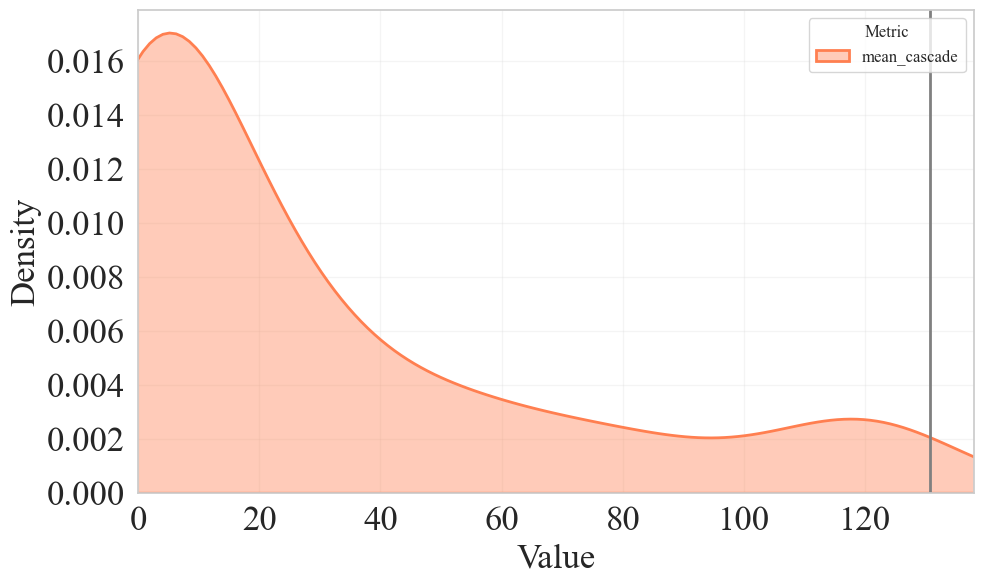

In [ ]:
thr = df_result_no_zero['mean_cascade'].quantile(0.99)

plt.figure(figsize=(10, 6))
ax = plt.gca()
sns.kdeplot(
    data=df_result_no_zero,
    x='mean_cascade',
    fill=True,
    label='mean_cascade',
    color='coral',
    alpha=0.4,
    linewidth=2,
)
ax.axvline(thr, color='grey', linestyle='-', linewidth=2)

plt.xlabel("Value", fontsize=25)
plt.ylabel("Density", fontsize=25)
plt.legend(title="Metric", fontsize=12, title_fontsize=12, loc='upper right')
plt.grid(True, linestyle='-', alpha=0.2)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 1.0 * df_result_no_zero[['mean_cascade']].max().max())  
plt.tight_layout()
plt.show()

In [586]:
thr

130.6823

In [585]:
df_result_no_zero.groupby('category')[['mean_cascade', 'p_any_cascade']].mean().sort_values(by='mean_cascade', ascending=False).round(2)

mean_cascade  p_any_cascade
category                                  
IoT                   38.25           0.53
IT                    34.96           0.82
Network               32.01           0.56
Uncategorized         27.62           0.62
OT                    23.12           0.92
Other                 22.31           0.70

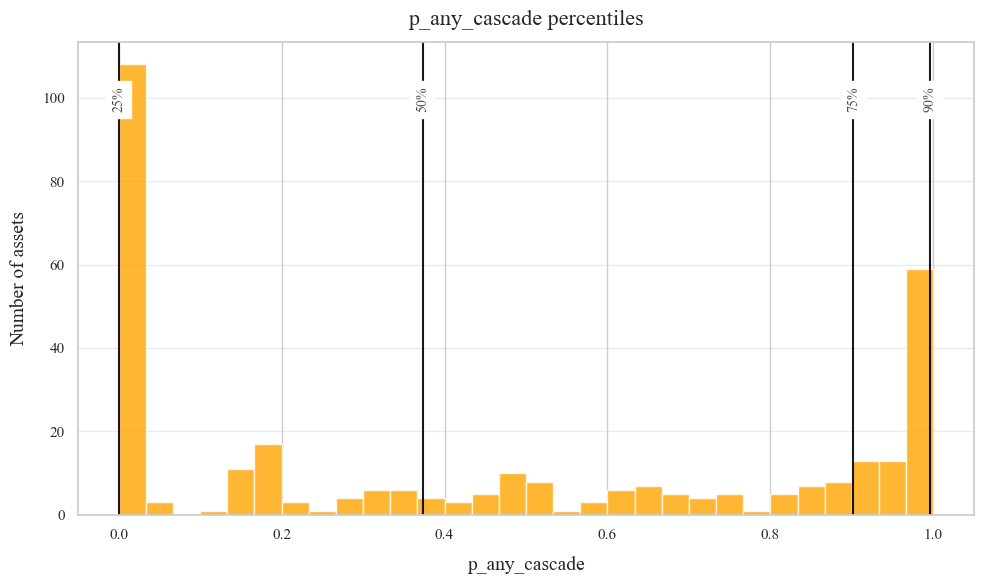

In [153]:
percentiles = [25, 50, 75, 90]
perc_values = np.percentile(df_results['p_any_cascade'], percentiles)

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(
    df_results['p_any_cascade'],
    bins=30,
    edgecolor='white',
    color='orange', 
    alpha=0.8  
)
plt.grid(axis='y', linestyle='-', alpha=0.4)
y_max = n.max()
for p, val in zip(percentiles, perc_values):
    plt.axvline(
        x=val,
        color='black',
        linestyle='-',
        linewidth=1.5,
        alpha=0.9
    )
    plt.text(
        val,
        y_max * 0.95,
        f"{p}%",
        rotation=90,
        color='black',
        fontsize=10,
        ha='center',
        va='top',
        backgroundcolor='white',
        alpha=0.7
    )

plt.title("p_any_cascade percentiles", fontsize=16, pad=12)
plt.xlabel("p_any_cascade", fontsize=14, labelpad=10)
plt.ylabel("Number of assets", fontsize=14, labelpad=10)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

plt.show()

In [80]:
seed = '6ff55d93-3105-413c-946a-6496ada898d3'  # pick one asset as example
replicates = 20  # number of independent runs per sample size
sample_sizes = [100, 500, 1000, 2000, 5000]

results_1 = []
for n_samples in sample_sizes:
    mean_estimates = []
    for _ in range(replicates):
        cascade_counts = sample_cascade(seed, n_samples=n_samples)
        mean_estimates.append(np.mean(cascade_counts))
    mean_array = np.array(mean_estimates)
    mean_of_means = mean_array.mean()
    std_err = mean_array.std(ddof=1) / np.sqrt(replicates)
    results_1.append((n_samples, mean_of_means, std_err))


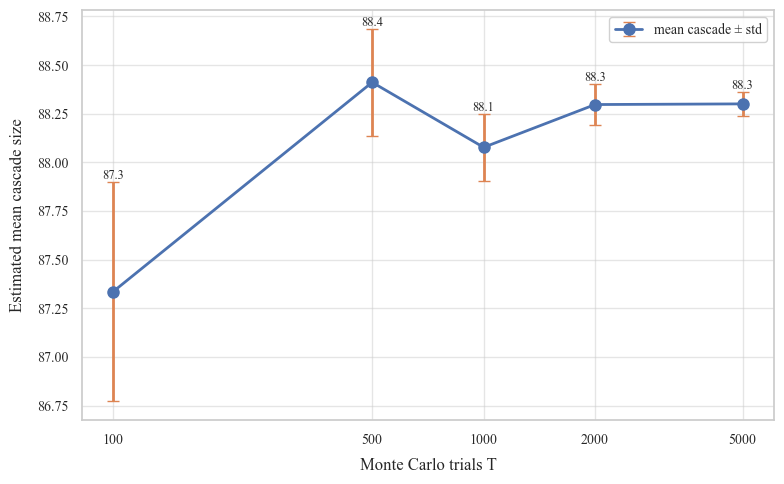

In [263]:
df_mc = pd.DataFrame(results_1, columns=['T','mean cascade','StdErr'])

plt.figure(figsize=(8, 5))
plt.errorbar(
    df_mc['T'], df_mc['mean cascade'], yerr=df_mc['StdErr'],
    fmt='o-', color='#4C72B0', ecolor='#DD8452',
    capsize=4, linewidth=2, markersize=8,
    label='mean cascade ± std'
)
plt.xscale('log')
plt.grid(axis='both', linestyle='-', alpha=0.5)

for _, row in df_mc.iterrows():
    plt.text(
        row['T'], row['mean cascade'] + row['StdErr'] + 0,
        f"{row['mean cascade']:.1f}",
        ha='center', va='bottom', fontsize=9
    )

plt.xlabel("Monte Carlo trials T", fontsize=12, labelpad=8)
plt.ylabel("Estimated mean cascade size", fontsize=12, labelpad=8)

plt.xticks(df_mc['T'], [str(r) for r in df_mc['T']], fontsize=10)
plt.yticks(fontsize=10)

plt.legend(loc='upper right', fontsize=10, framealpha=0.9)

plt.tight_layout()
plt.show()

# **Components in ALE**

**Asset Value**

V_ind: Independent value of asset

In [375]:
metric = 'mean_cascade'
min_val = 1_000.0
max_val = 50_000.0

vals = df_results[metric].values
v_min, v_max = vals.min(), vals.max()
denom = (v_max - v_min) or 1e-8
norm = (vals - v_min) / denom

df_results['V_ind'] = max_val + (1 - norm) * (min_val - max_val)  


In [376]:
df_results[['asset_id', metric, 'V_ind']].round(2).sort_values(by='V_ind', ascending=False)

asset_id  mean_cascade     V_ind
232  452d22f7-0894-405f-b689-cdc0ae748453        138.40  50000.00
9    4661e01a-3521-4a40-be48-dbb58467947b        134.66  48675.83
2    e56f6f40-5645-4f7c-bea2-fd8a3f415fdc        131.21  47456.46
161  a11c8ba4-b53d-4389-a020-8cb0c0f34cf2        130.09  47058.14
30   4f2e8737-8795-4252-b70a-fbfb0ed828a1        126.97  45953.84
..                                    ...           ...       ...
187  ab077620-59c2-4a81-91ac-ed96996da47d          0.00   1000.00
242  c9165dc0-c6a3-4844-a11b-92cab69570d6          0.00   1000.00
45   30813bba-e005-4d69-9c2a-3e6a2682f30f          0.00   1000.00
240  9015b52a-bed6-4e42-b02e-6c873966dc3b          0.00   1000.00
149  6fcc0794-9018-40f2-917c-94c8c66f44b5          0.00   1000.00

[327 rows x 3 columns]

In [377]:
df_results_copy = df_results.copy(deep=True)

In [378]:
V_ind_map = {
    row['asset_id']: min_val + norm_val * (max_val - min_val)
    for row, norm_val in zip(df_results_copy.to_dict('records'), norm)}

raw_edges = pd.DataFrame([
    {'src': i, 'tgt': j, 'raw': m['p_ij']}
    for (i, j), m in p_ij.items()
])

# Compute scaling factors for each target to normalize alpha_ij
scale_map = {}
for tgt, grp in raw_edges.groupby('tgt'):
    total = grp['raw'].sum() or 1e-8
    scale_map[tgt] = 1.0 / total

# Apply scaling to get alpha_ij
raw_edges['alpha'] = raw_edges.apply(
    lambda x: x['raw'] * scale_map[x['tgt']], axis=1
)

# Build parent_map for quick access later
parent_map = {node: [] for node in V_ind_map}
for _, row in raw_edges.iterrows():
    parent_map[row['tgt']].append((row['src'], row['alpha']))



V_dep: Dependent value of asset

In [ ]:
# Compute V_dep explicitly using only parent V_ind values
V_dep = {}
for j in V_ind_map:
    if parent_map[j]:  # Only if j has parents (case 2)
        V_dep[j] = sum(alpha * V_ind_map[i] for i, alpha in parent_map[j])
    else:  # No parents (case 1)
        V_dep[j] = 0.0

# Compute V_tot by summing independent and dependent values
V_tot = {j: V_ind_map[j] + V_dep[j] for j in V_ind_map}

df_vals = pd.DataFrame({
    'asset_id': list(V_ind_map.keys()),
    'V_ind': list(V_ind_map.values()),
    'V_dep': [V_dep[j] for j in V_ind_map],
    'V_tot': [V_tot[j] for j in V_ind_map],
})


In [507]:
df_vals.sort_values(by='V_tot', ascending=True).head(10)

asset_id        V_ind        V_dep  \
324  b0c61cab-01bf-44f1-8a92-1d5acf98c01c  1000.000000     0.000000   
288  2f33b10d-9d3c-462c-a659-8143e291c4a9  1000.000000     0.000000   
261  084c2974-7e63-4f02-a829-50ed7686413a  1000.000000     0.000000   
270  ce983d6d-e331-4a53-9f3a-15c03e95a3b8  1057.003093     0.000000   
307  c850cacc-cdf2-48b4-bf9d-814bc41fb67a  1058.773375     0.000000   
322  899713d8-9a57-4b2d-9aa3-de29ee5294ef  1080.370820     0.000000   
312  169443b7-f7fa-4890-97a2-1dc5fa5d8ea0  1136.311743     0.000000   
176  d3ea9295-c53e-4fd9-885e-a64574e397ec  1000.000000  1093.470910   
251  01e36daf-0f76-4d43-b3a4-bffdc5c22e79  1066.562617  1442.924651   
311  a3d38c6f-c152-4c92-be14-52bb8617ca46  1099.843926  1439.738143   

           V_tot        EF  
324  1000.000000  1.000000  
288  1000.000000  1.000000  
261  1000.000000  1.000000  
270  1057.003093  1.000000  
307  1058.773375  1.000000  
322  1080.370820  1.000000  
312  1136.311743  1.000000  
176  2093.470910  0.522324  
251  2509.487268  0.574988  
311  2539.582069  0.566919

**Exposure Factor**

Based on αij 

In [381]:
EF = {}
for j in V_ind_map:
    if not parent_map[j]:  # Case (1)
        EF[j] = 1.0
    else:  # Case (2)
        EF[j] = V_dep[j] / V_tot[j] if V_tot[j] > 0 else 0.0

In [382]:
df_vals = pd.DataFrame({
    'asset_id': list(V_ind_map.keys()),
    'V_ind': list(V_ind_map.values()),
    'V_dep': [V_dep[j] for j in V_ind_map],
    'V_tot': [V_tot[j] for j in V_ind_map],
    'EF': [EF[j] for j in V_ind_map],
})
df_vals.sort_values(by='EF', ascending=False).head(10)

asset_id        V_ind  V_dep        V_tot  \
56   c140081a-a402-4b0b-9925-6e43026e0fd2  4276.438625    0.0  4276.438625   
312  169443b7-f7fa-4890-97a2-1dc5fa5d8ea0  1136.311743    0.0  1136.311743   
104  5a4d4ad3-369b-4d17-bd0e-c15f9dcde5ae  4128.797075    0.0  4128.797075   
288  2f33b10d-9d3c-462c-a659-8143e291c4a9  1000.000000    0.0  1000.000000   
51   800c31a3-5969-4fb9-8cc8-cd3e61f5619c  7402.403249    0.0  7402.403249   
107  f2a57c02-7ce7-4a87-92b7-41cb6c59e0e5  4083.831903    0.0  4083.831903   
55   71cbf188-a115-46d3-aa2f-5957a9075e52  4514.364577    0.0  4514.364577   
78   5bc073a4-3da1-4f45-8e74-34de52b1cdf9  4204.211104    0.0  4204.211104   
307  c850cacc-cdf2-48b4-bf9d-814bc41fb67a  1058.773375    0.0  1058.773375   
113  f23b0ab4-3f0d-452b-9d26-13dfbb57db9b  4527.464667    0.0  4527.464667   

      EF  
56   1.0  
312  1.0  
104  1.0  
288  1.0  
51   1.0  
107  1.0  
55   1.0  
78   1.0  
307  1.0  
113  1.0

**SLE & ALE**

In [383]:
df_final = df_vals.copy()
df_final['P_base'] = df_final['asset_id'].map(P_base)  
df_final['SLE'] = df_final['V_tot'] * df_vals['EF']   # single‐loss expectancy
df_final['ALE'] = df_final['SLE']   * df_final['P_base']  # annual loss expectancy
df_final = df_final.fillna(0)    

In [ ]:
df_final.sort_values(by='ALE', ascending=False).round(2)
#df_final.to_csv('/Users/ngantram/Documents/Thesis UvA/Thesis/code/VLAN_51_final_results.csv', index=False)

In [385]:
df_final[['V_ind', 'V_dep', 'V_tot', 'EF', 'P_base', 'SLE', 'ALE']].describe().style.format({"SLE": "{:.2f}", "ALE": "{:.2f}", "V_tot": "{:.2f}", "EF": "{:.2f}", "P_base": "{:.2f}", "V_dep": "{:.2f}", "V_ind": "{:.2f}"})

In [ ]:
df_final['ALE'].sum()

5258340.551697644

In [445]:
df_final['V_tot'].sum()

10834133.5871373

Analysis on ALE 

In [ ]:
cols = ['ALE', 'V_tot', 'EF', 'P_base']
subset = df_final[cols]
corr = subset.corr()
corr.round(3)

ALE  V_tot     EF  P_base
ALE     1.000  0.872 -0.084   0.805
V_tot   0.872  1.000 -0.215   0.669
EF     -0.084 -0.215  1.000  -0.378
P_base  0.805  0.669 -0.378   1.000

/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


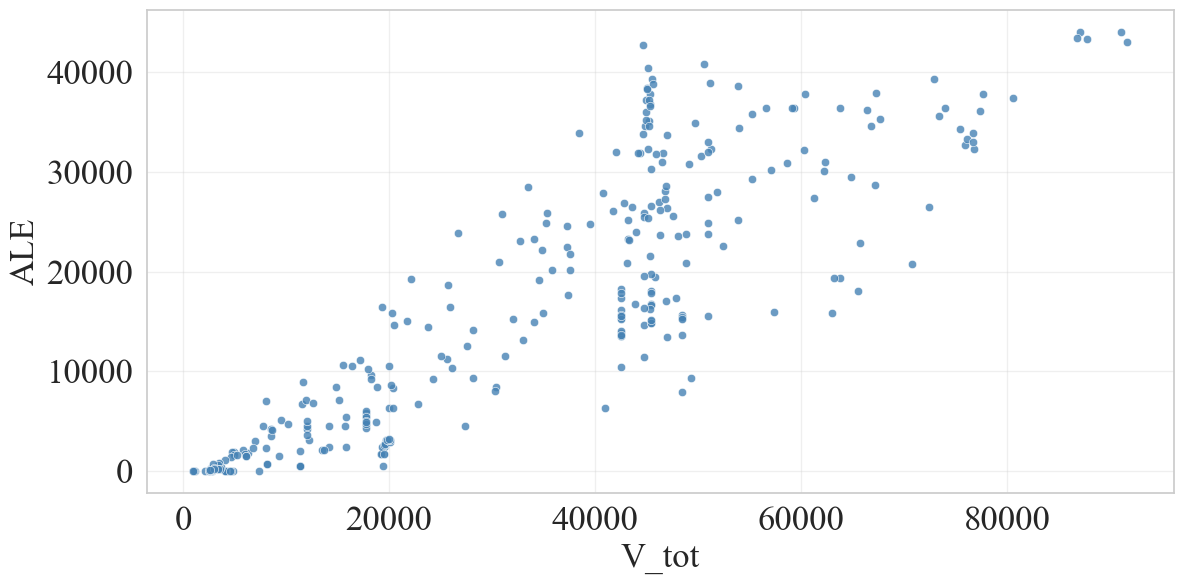

In [ ]:
#ALE vs V_tot

plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df_final, 
    x='V_tot', 
    y='ALE',
    alpha=0.8,
    color='steelblue'
)

plt.xlabel("V_tot", fontsize=25)
plt.ylabel("ALE", fontsize=25)
plt.grid(True, linestyle='-', alpha=0.3)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.show()


/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


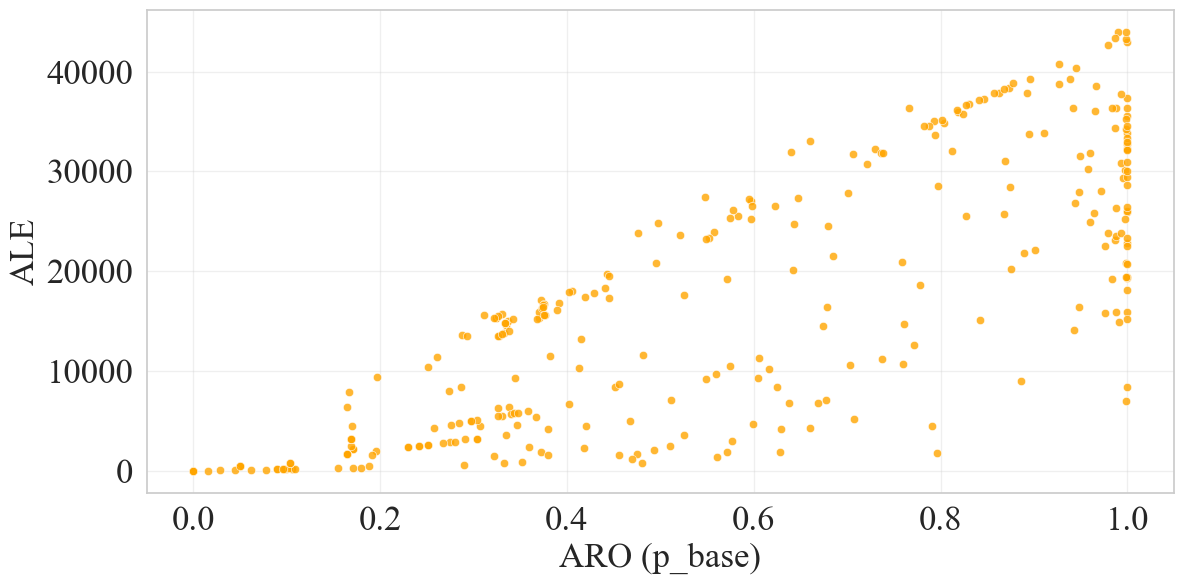

In [ ]:
#ALE vs ARO
plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df_final, 
    x='P_base', 
    y='ALE',
    alpha=0.8,
    color='orange'
)

plt.xlabel("ARO (p_base)", fontsize=25)
plt.ylabel("ALE", fontsize=25)
plt.grid(True, linestyle='-', alpha=0.3)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.show()


/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


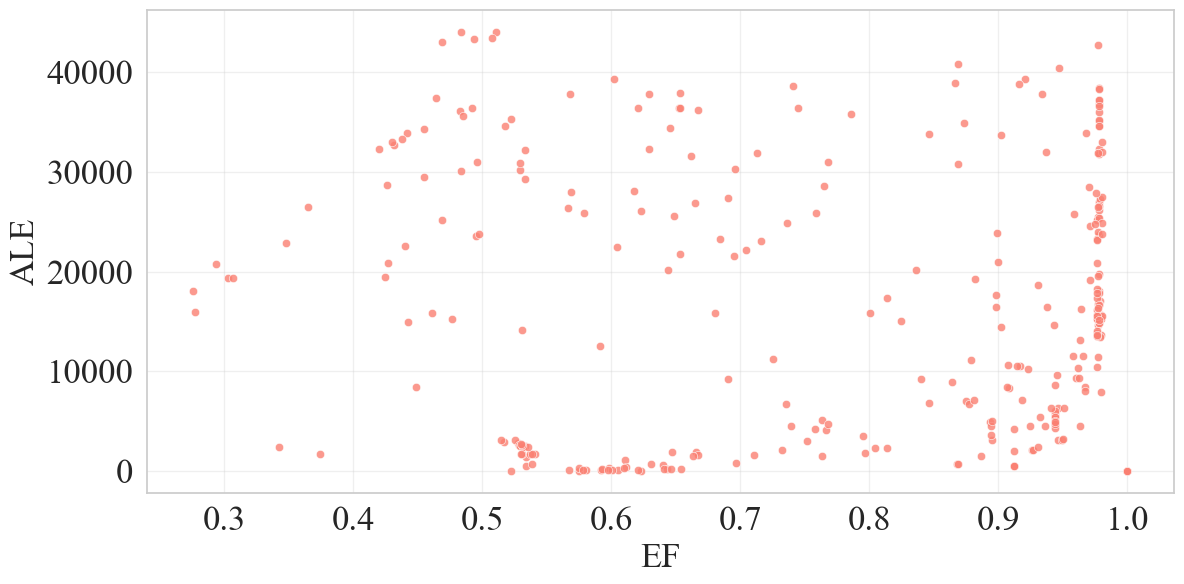

In [ ]:
# ALE vs EF
plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df_final, 
    x='EF', 
    y='ALE',
    alpha=0.8,
    color='salmon'
)

plt.xlabel("EF", fontsize=25)
plt.ylabel("ALE", fontsize=25)
plt.grid(True, linestyle='-', alpha=0.3)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.show()


/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


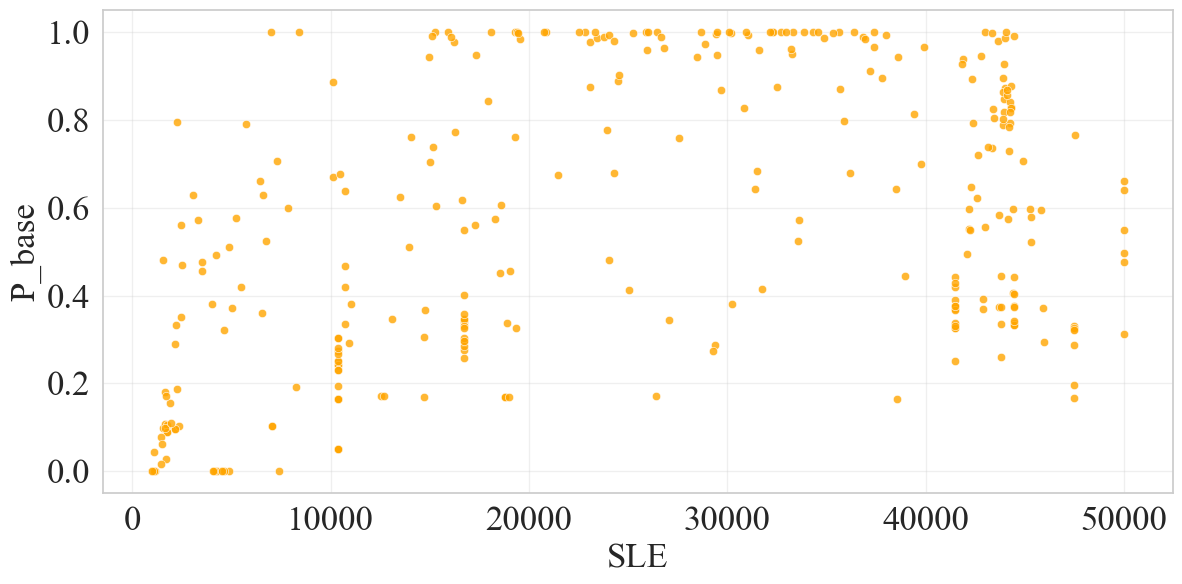

In [ ]:
# ARO vs SLE
plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df_final, 
    x='SLE', 
    y='P_base',
    alpha=0.8,
    color='orange'
)

plt.xlabel("SLE", fontsize=25)
plt.ylabel("P_base", fontsize=25)
plt.grid(True, linestyle='-', alpha=0.3)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.show()


/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


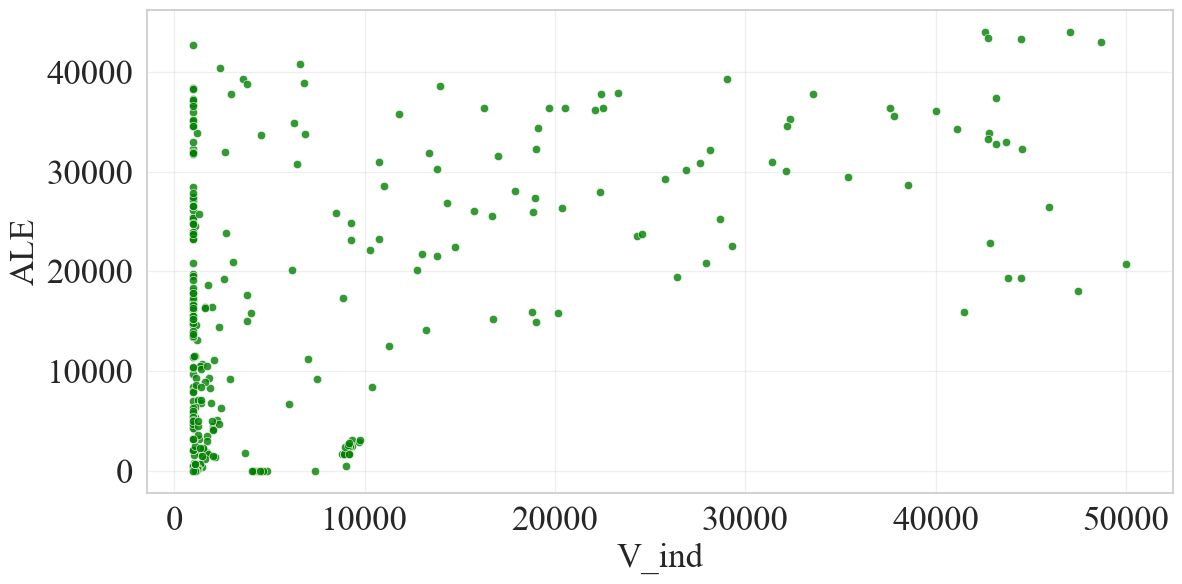

In [ ]:
# ALE vs V_ind
plt.figure(figsize=(12, 6))
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
sns.scatterplot(
    data=df_final, 
    x='V_ind', 
    y='ALE',
    alpha=0.8,
    color='green'
)

plt.xlabel("V_ind", fontsize=25)
plt.ylabel("ALE", fontsize=25)
plt.grid(True, linestyle='-', alpha=0.3)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.show()


/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


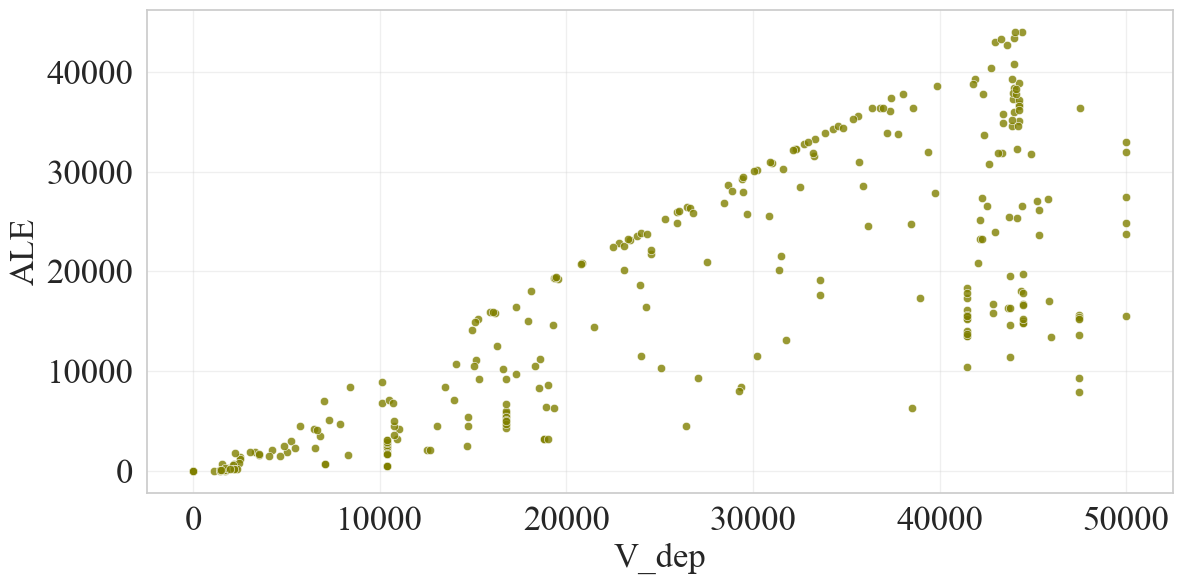

In [ ]:
# ALE vs V_dep
plt.figure(figsize=(12, 6))
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
sns.scatterplot(
    data=df_final, 
    x='V_dep', 
    y='ALE',
    alpha=0.8,
    color='olive'
)

plt.xlabel("V_dep", fontsize=25)
plt.ylabel("ALE", fontsize=25)
plt.grid(True, linestyle='-', alpha=0.3)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.show()

**Visualization: identify critical assets**

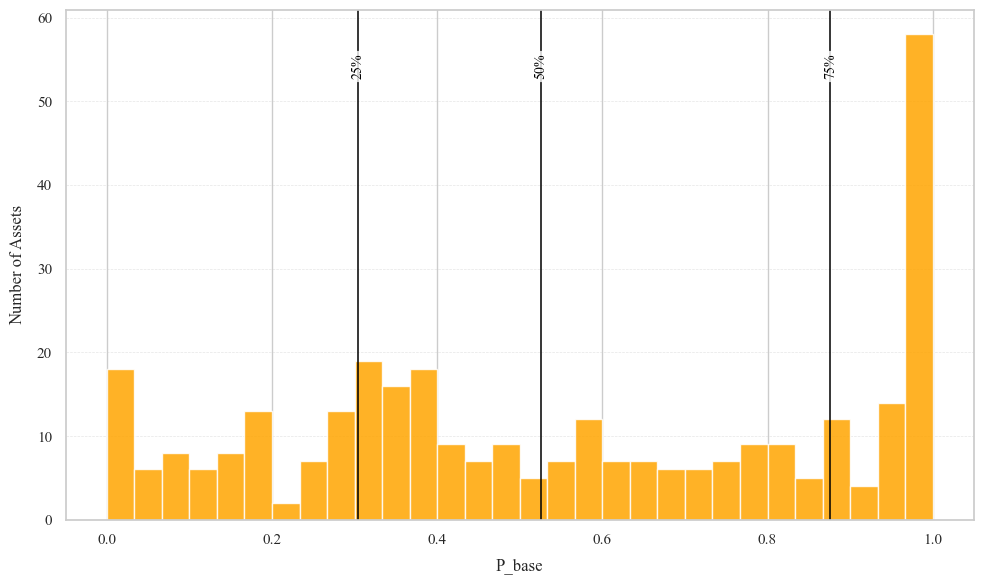

In [ ]:
percentiles = [25, 50, 75]
perc_values = np.percentile(P_base_df['P_base'], percentiles)

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(
    P_base_df['P_base'],
    bins=30,
    edgecolor='white',
    color='#FFA500',  
    alpha=0.85
)

plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.5)

y_max = n.max()
for p, val in zip(percentiles, perc_values):
    plt.axvline(x=val, color='black', linestyle='-', linewidth=1.3, alpha=0.85)
    plt.text(
        val,
        y_max * 0.96,
        f"{p}%",
        rotation=90,
        fontsize=10,
        ha='center',
        va='top',
        color='black',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.8, boxstyle='round,pad=0.2')
    )

plt.xlabel("P_base", fontsize=12, labelpad=8)
plt.ylabel("Number of Assets", fontsize=12, labelpad=8)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()


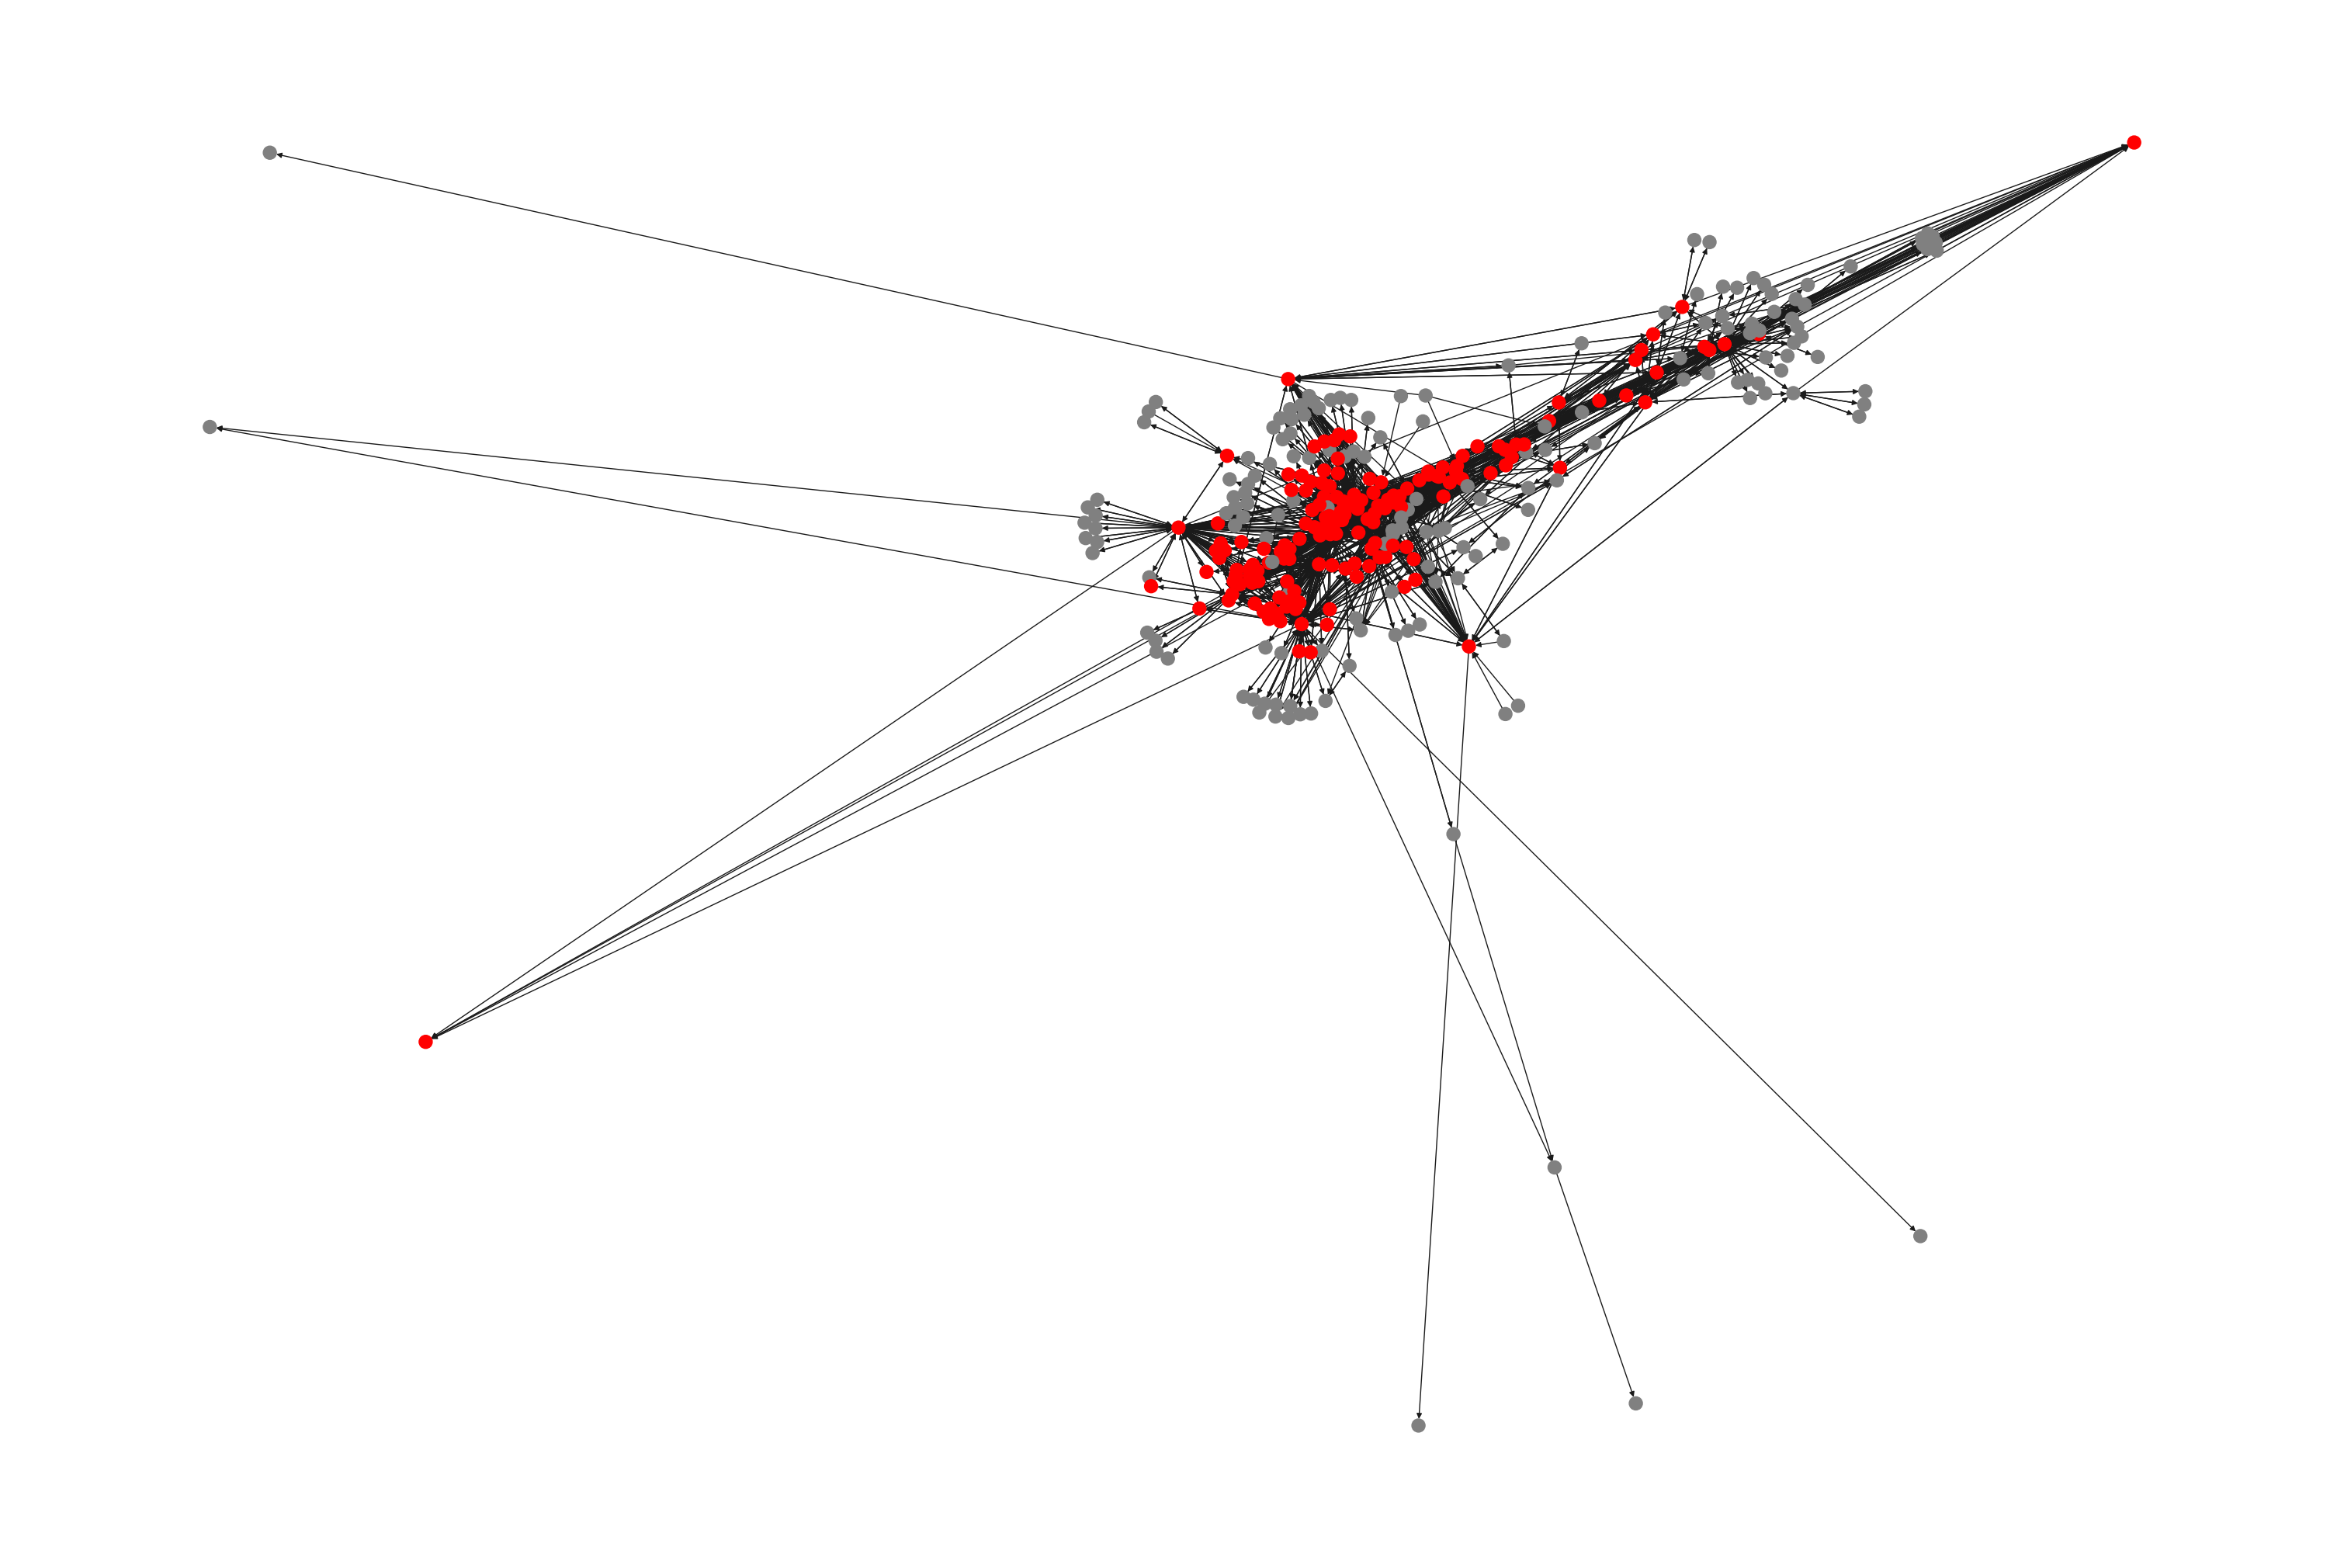

In [ ]:
#red nodes are nodes with p_base higher than mean p_base
mean_P = np.mean(list(P_base.values()))

node_colors = [
    'red' if P_base[node] > mean_P else 'gray'
    for node in G_51.nodes()
]

plt.figure(figsize=(30, 20))
pos = nx.spring_layout(G_51, seed=42)  
nx.draw(
    G_51,
    pos,
    with_labels=False,
    node_size=150,
    node_color=node_colors,
    font_size=8
)
plt.axis('off')
plt.show()


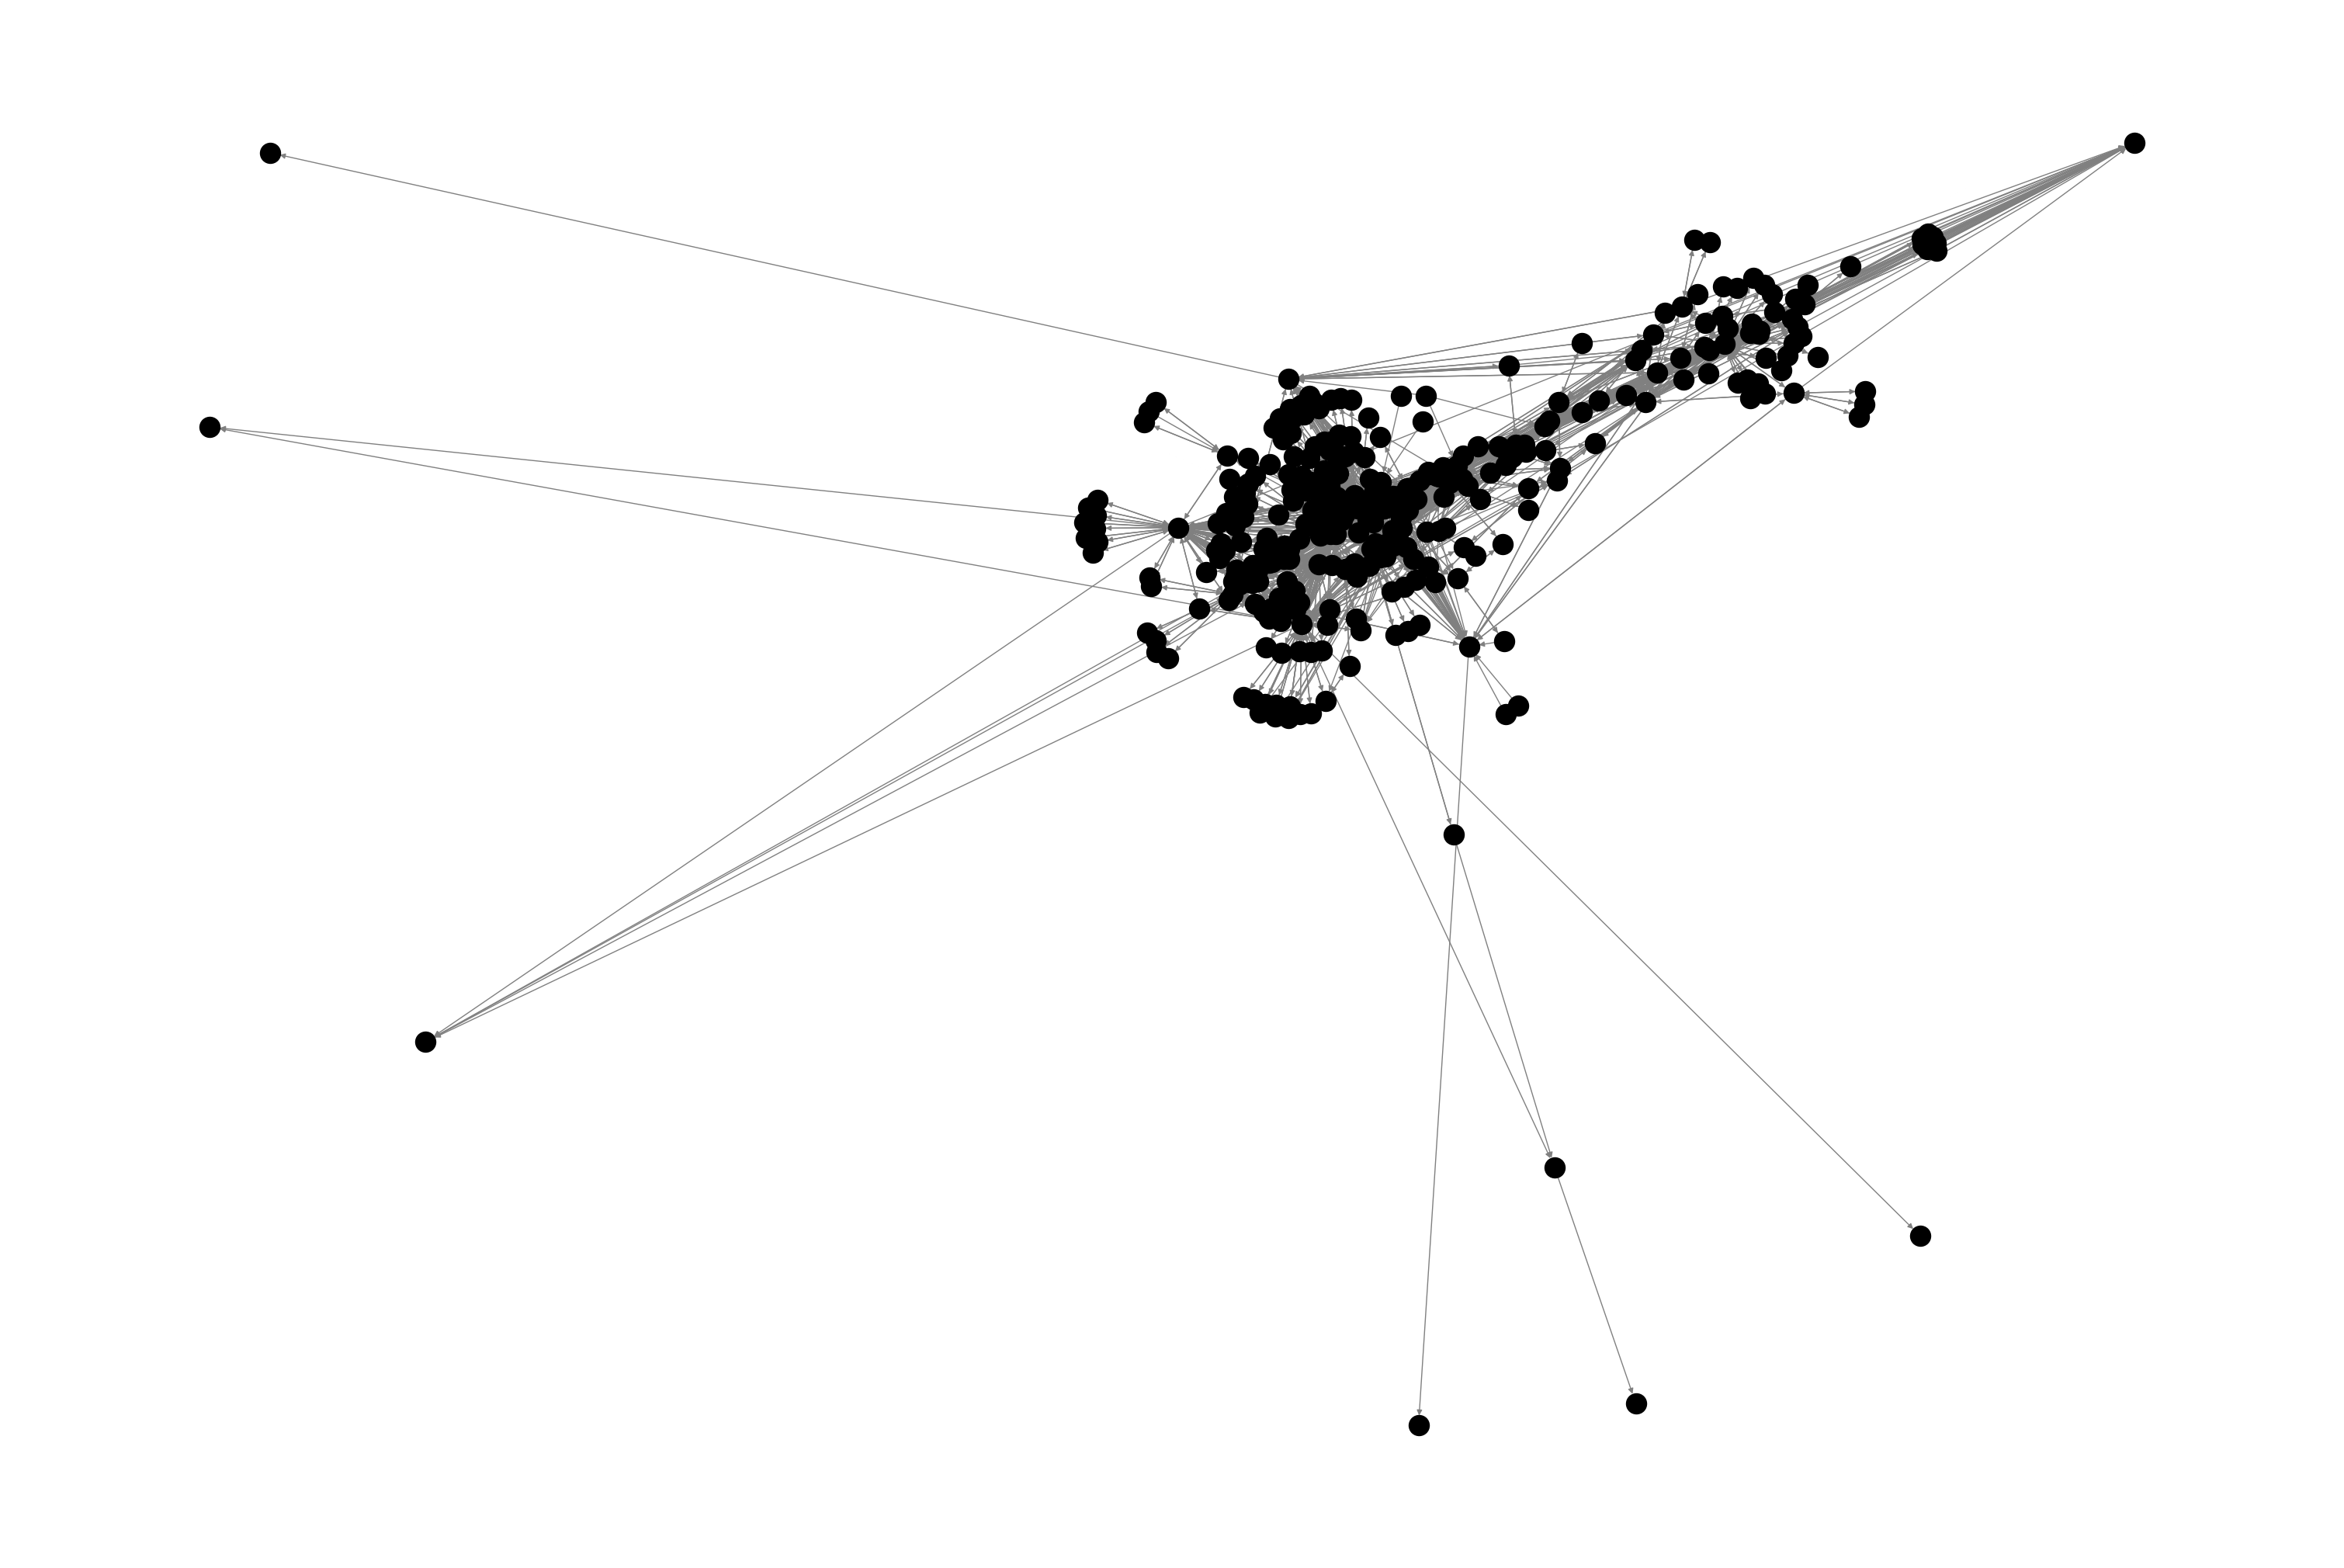

In [322]:
plt.figure(figsize=(30, 20))
pos = nx.spring_layout(G_51, seed=42)  
nx.draw(
    G_51,
    pos,
    with_labels=False,
    node_size=350,
    node_color='black',
    edge_color='grey',
    font_size=8
)
plt.axis('off')
plt.show()


25th percentile = 0.3037, 75th percentile = 0.8762


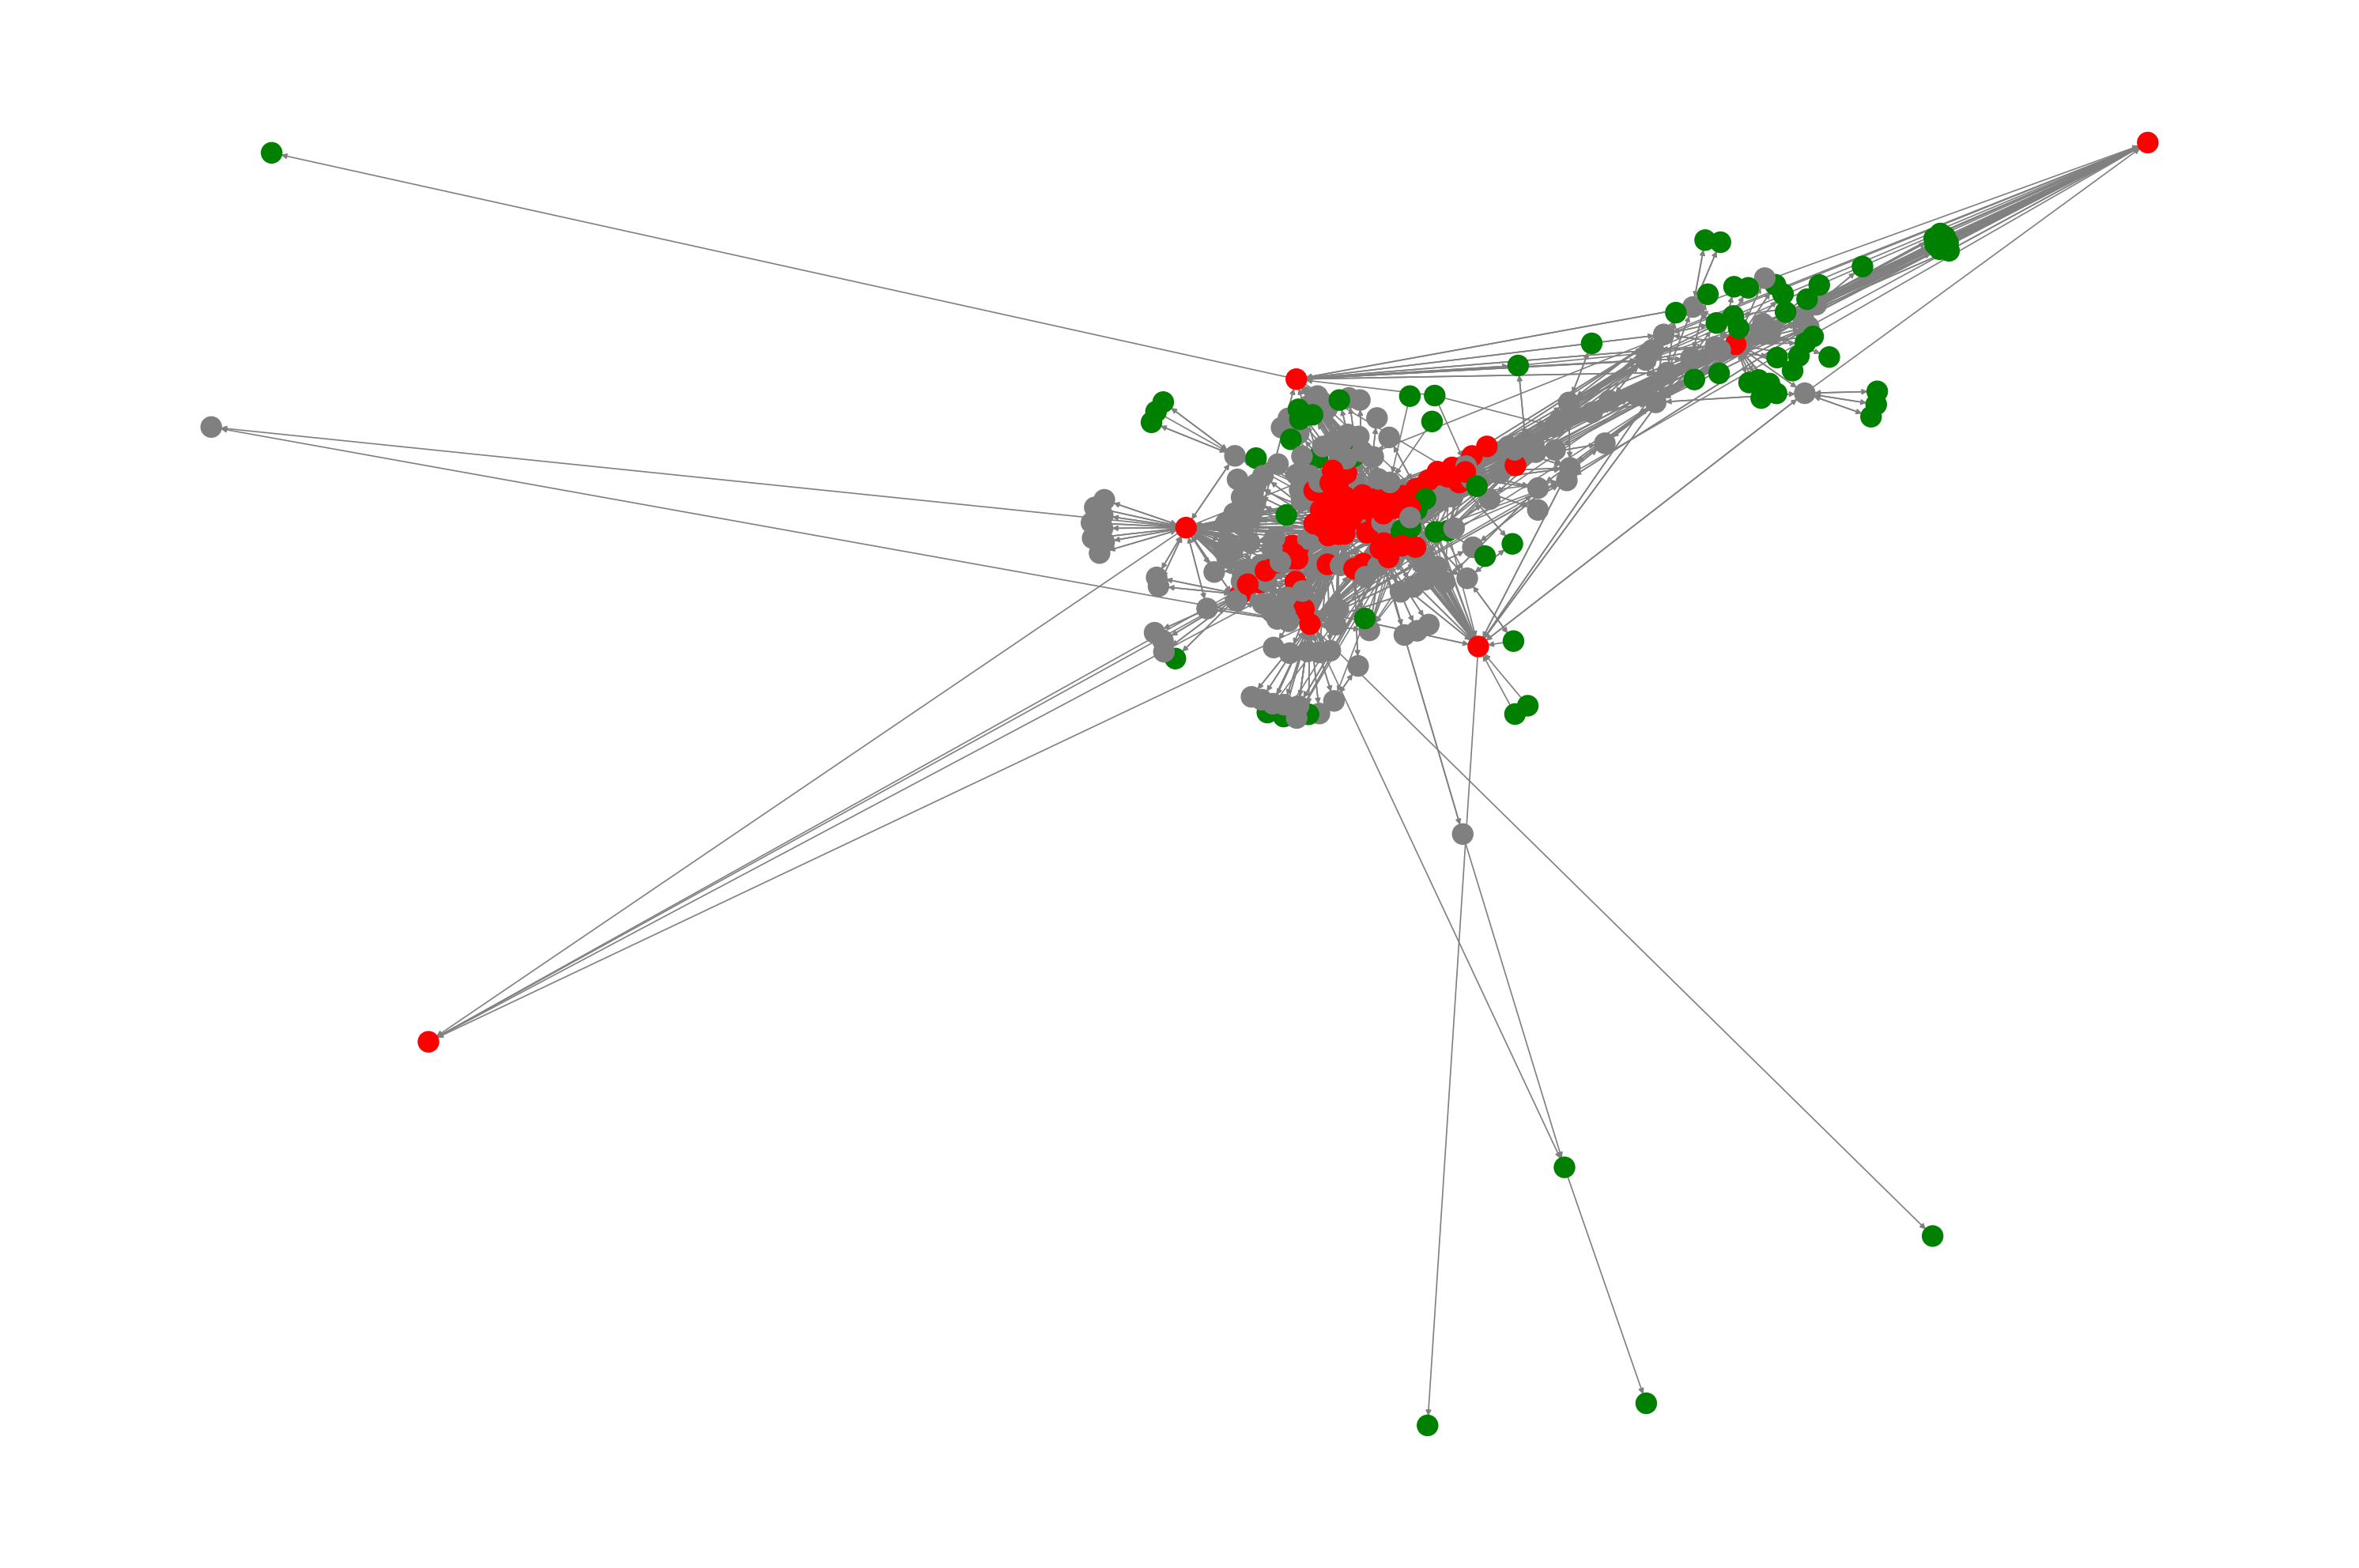

In [ ]:
p_values = np.array(list(P_base.values()))
q25 = np.percentile(p_values, 25) #green nodes have p_base lower than 25th percentile
q75 = np.percentile(p_values, 75) #red nodes have p_base higher than 75th percentile

print(f"25th percentile = {q25:.4f}, 75th percentile = {q75:.4f}")

node_colors = []
for node in G_51.nodes():
    p = P_base.get(node, 0.0)
    if p < q25:
        node_colors.append('green')
    elif p > q75:
        node_colors.append('red')
    else:
        node_colors.append('gray')

plt.figure(figsize=(30, 20))
pos = nx.spring_layout(G_51, seed=42) 

nx.draw_networkx_nodes(
    G_51,
    pos,
    node_color=node_colors,
    node_size=350,
    linewidths=1.0
)

nx.draw_networkx_edges(
    G_51,
    pos,
    edge_color='grey',
    width=1.2
)

plt.axis('off')
plt.tight_layout()
plt.show()

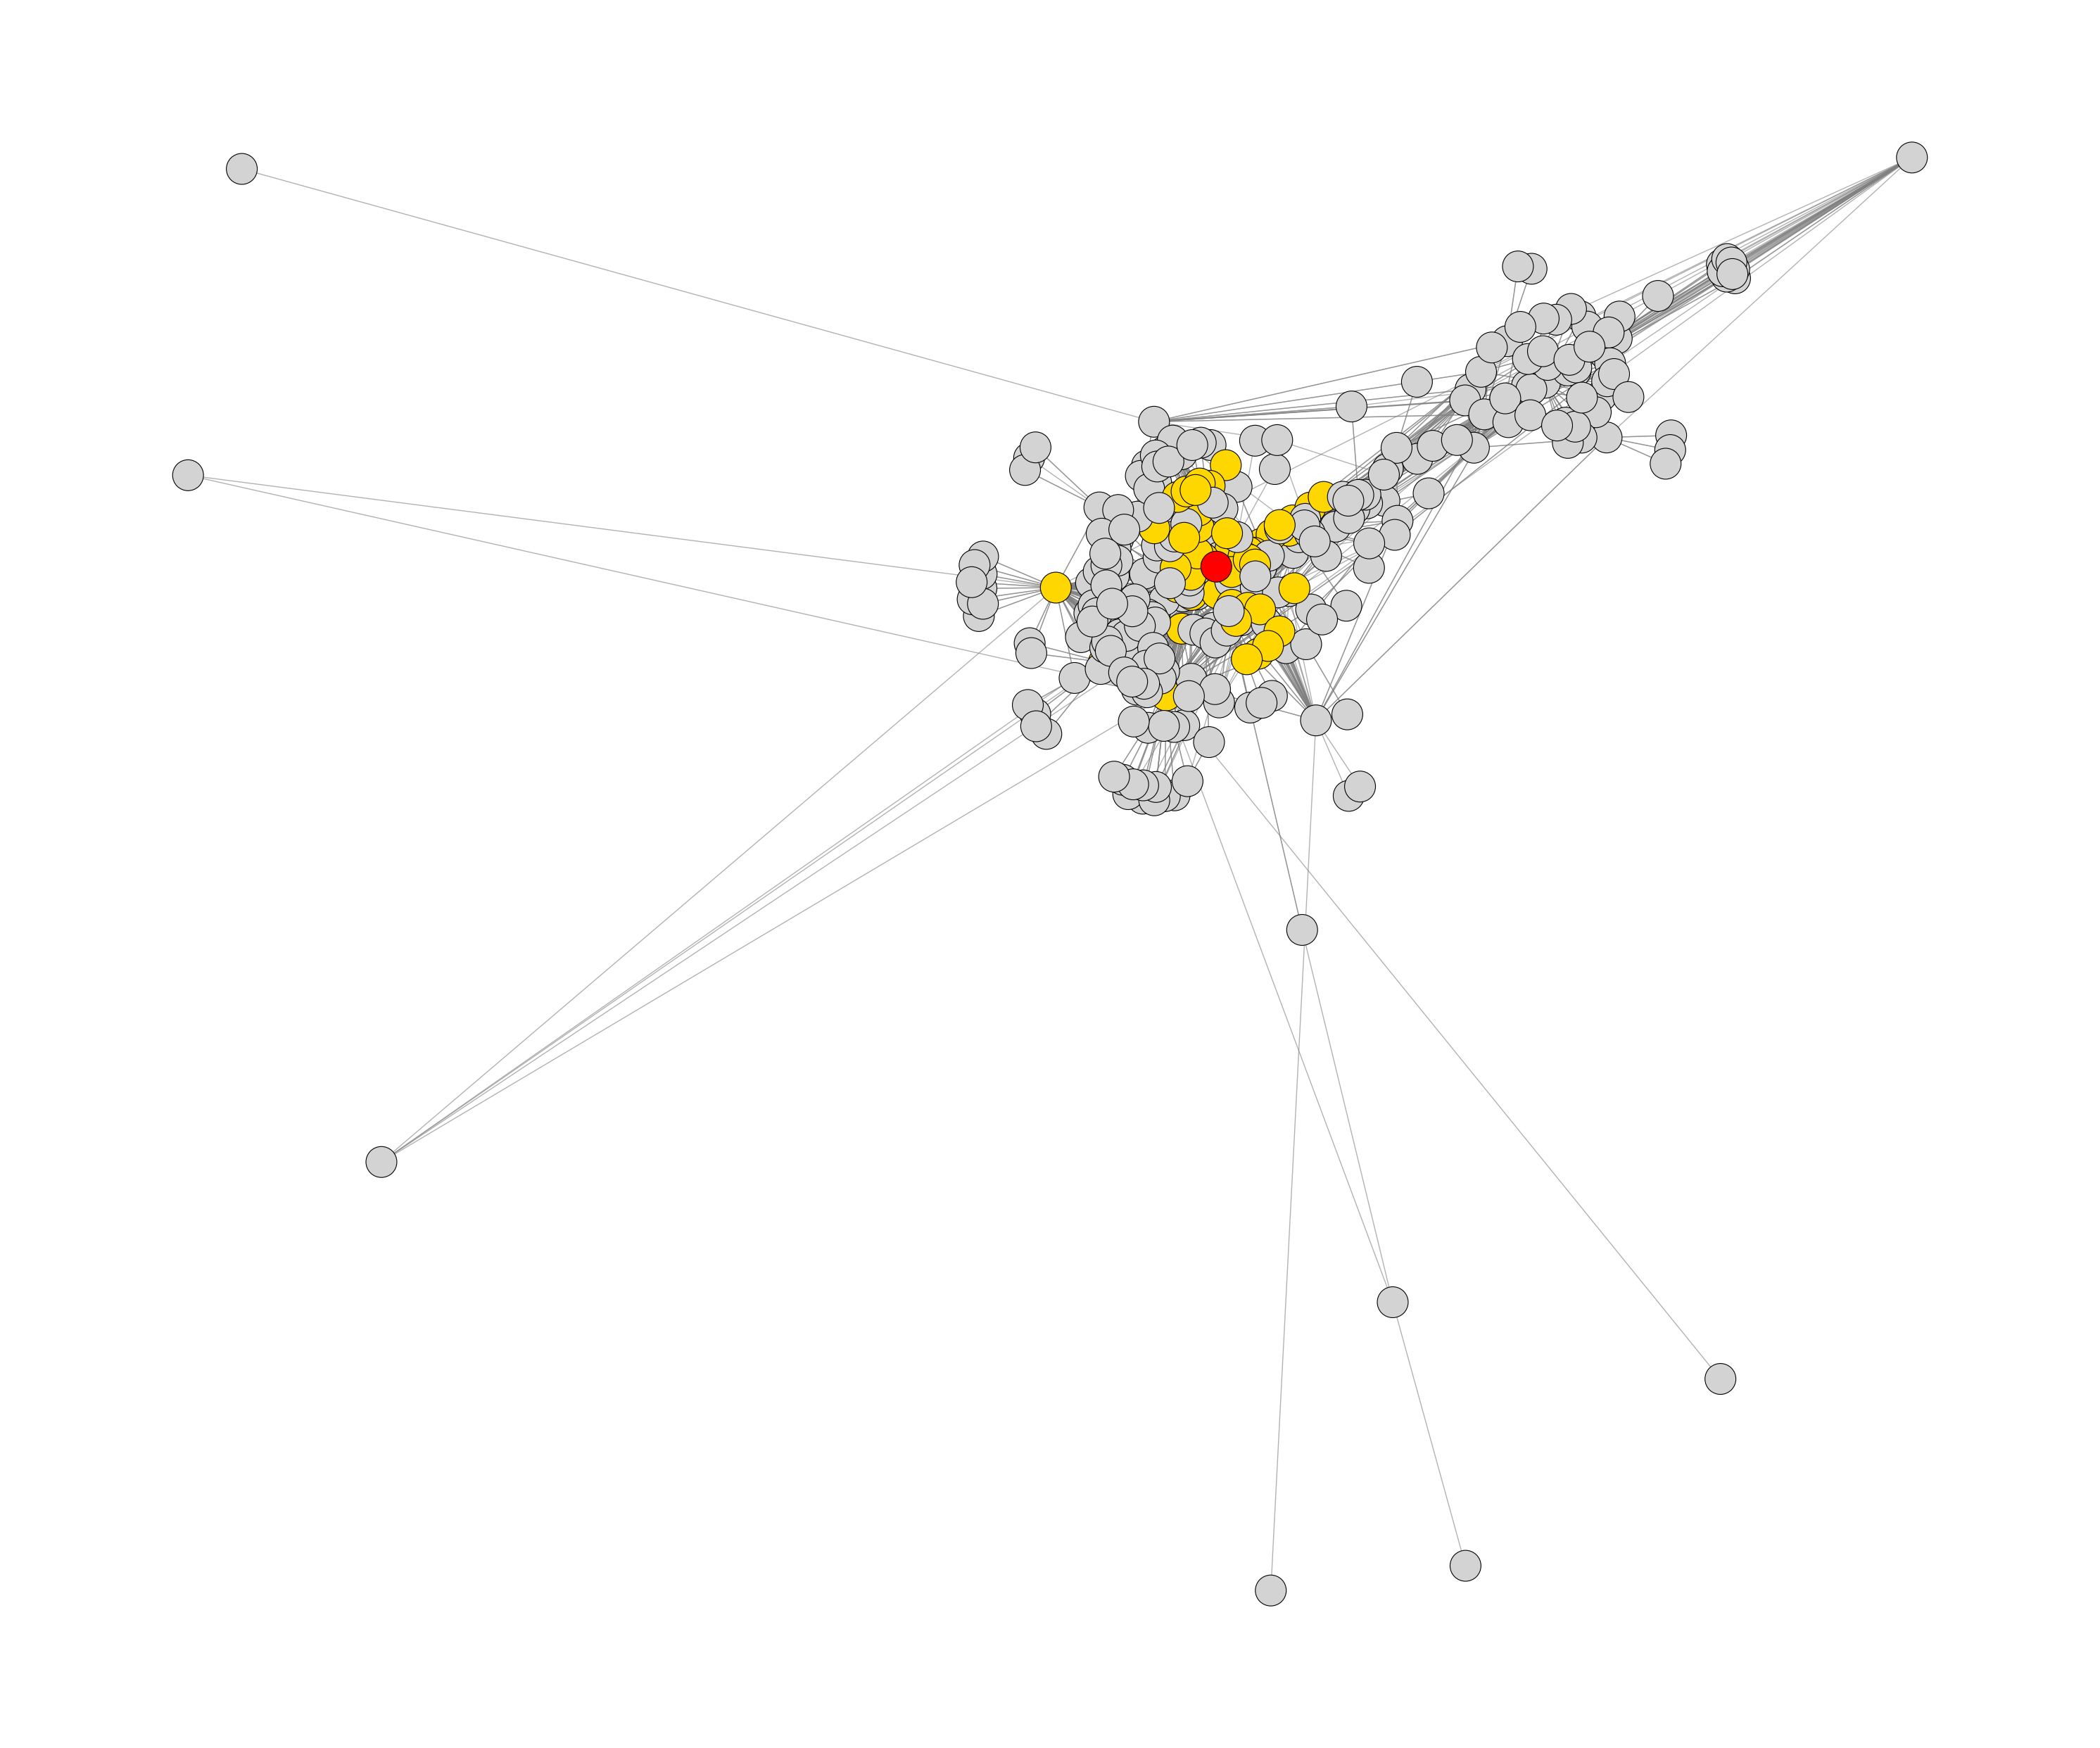

In [317]:
target_node = "452d22f7-0894-405f-b689-cdc0ae748453"

if target_node not in G_51:
    raise ValueError(f"Node {target_node} not found in G_51")

direct_deps = list(G_51.successors(target_node))
node_colors = []
for node in G_51.nodes():
    if node == target_node:
        node_colors.append('red')
    elif node in direct_deps:
        node_colors.append('gold')
    else:
        node_colors.append('lightgray')


plt.figure(figsize=(30, 25))

# Use a deterministic layout for reproducibility
pos = nx.spring_layout(G_51, seed=42)

# Draw nodes with assigned colors
nx.draw_networkx_nodes(
    G_51,
    pos,
    node_color=node_colors,
    node_size=1000,
    edgecolors='black',
    linewidths=0.8
)

# Draw directed edges (arrows)
nx.draw_networkx_edges(
    G_51,
    pos,
    edge_color='gray',
    alpha=0.6,
    width=1.0
)

plt.axis('off')
plt.tight_layout()
plt.show()


**Comparing old ALE and new ALE**

In [528]:
cols_df1 = asset_merged[['id', 'computed_value']]
cols_df2 = df_final[['asset_id', 'ALE']]

test_df = cols_df2.merge(cols_df1, left_on='asset_id', right_on='id', how='left')
test_df[['id', 'computed_value', 'ALE']].sort_values(by='computed_value', ascending=False)


id  computed_value           ALE
255  e128b3f2-796f-45b5-92f2-129c0dd8c8ff          150000   5461.100914
87   d84478e3-ec75-427a-a219-2053c49ef78e           67263  29479.912663
188  68c06b80-b39c-40d4-828c-fdf28329df2b           50618  19428.748441
8    3a606798-de39-46a6-bdd7-4e02547c379c           47693   8424.448968
193  f5fd482a-794e-4a5f-aac3-f2754d231380           46452  30929.029714
..                                    ...             ...           ...
201  bc41485c-eedd-4d92-aaee-131682724d6c               0  23203.682108
202  8ce2bbd2-e1fd-492d-b1ec-0993038e2c3f               0  25195.140416
50   d559dbfe-8b40-4893-a57f-78fe303c6173               0  27009.785898
120  4ed4c961-19a3-472d-8038-924c35f2ab3b               0    293.251362
105  885d5073-c5b6-4feb-9958-915942a1be12               0  15893.915661

[327 rows x 3 columns]

Comparing the distributions 

/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

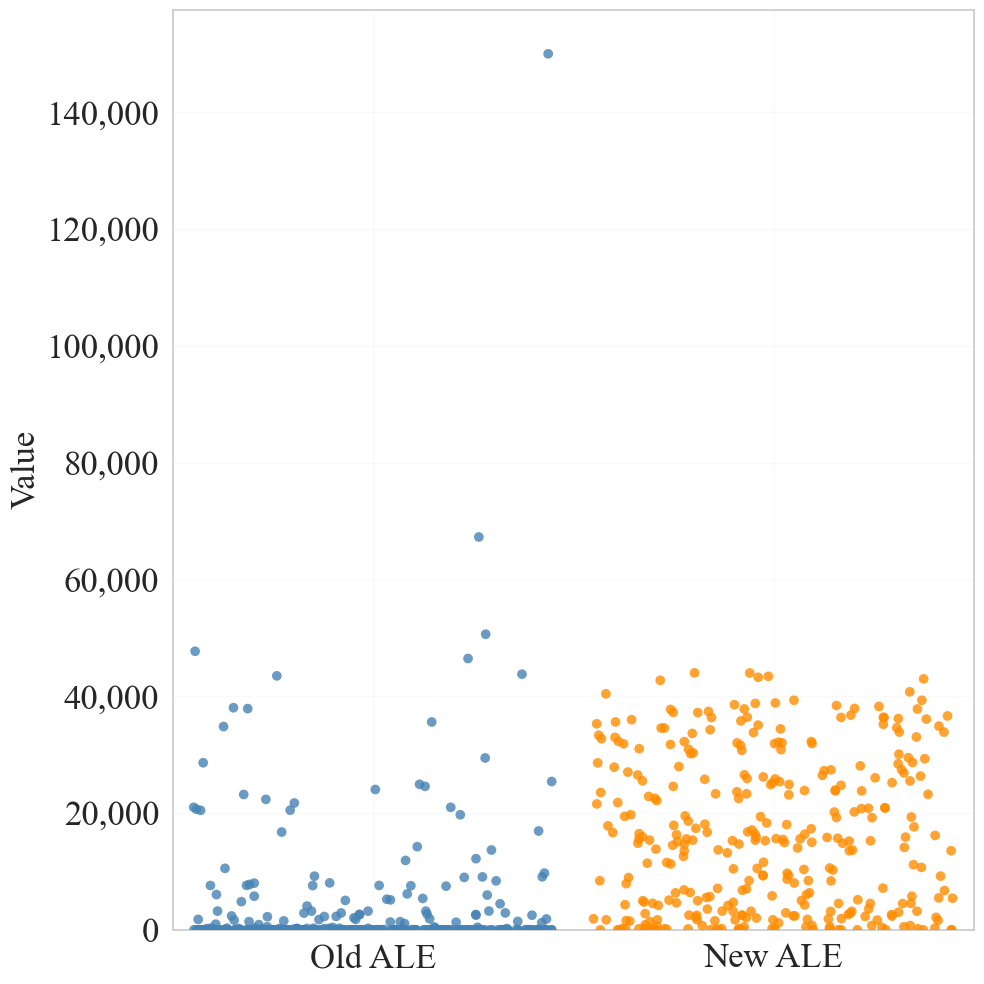

In [ ]:
melted = test_df.melt(
    value_vars=['computed_value','ALE'],
    var_name='Metric',
    value_name='Value'
)
melted['Metric'] = melted['Metric'].replace({
    'computed_value': 'Old ALE',
    'ALE':             'New ALE'
})

plt.figure(figsize=(10,10))

ax = sns.stripplot(
    data=melted,
    x='Metric',
    y='Value',
    jitter=0.45,                   
    size=7,
    edgecolor=['navy', 'darkorange'],
    alpha=0.8,
    palette=['steelblue','darkorange']
)

ymax = melted['Value'].max()
ax.set_ylim(0, ymax * 1.05)
ax.yaxis.set_major_locator(ticker.MultipleLocator(20000))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax.set_xlabel("", fontsize=25)
ax.set_ylabel("Value", fontsize=25)
ax.tick_params(labelsize=25)
plt.grid(True, which='major', linestyle='-', alpha=0.1)
plt.tight_layout()
plt.show()


Checking value "0" in old and new ALE 

In [593]:
test_df[test_df['computed_value'] == 0.0]

asset_id           ALE  \
1    551b1bd7-facb-4384-9b42-addd9a63c04e   7007.415232   
3    a5445053-6b28-450b-9e2d-886b0cb2e7b7  43987.089416   
4    a6fb3808-fade-4e11-9cf0-547f94ebf601  33857.932436   
9    4661e01a-3521-4a40-be48-dbb58467947b  42972.427121   
11   15dfe0ca-cef2-4de8-ad78-0c0e795a2461  42724.876326   
..                                    ...           ...   
320  20b2b866-a6be-4317-aa19-f6e76ba8286c     91.584112   
321  870b08e1-f42b-46e9-a787-7e8cf64db856  31838.354038   
322  899713d8-9a57-4b2d-9aa3-de29ee5294ef      0.000000   
323  610674b1-bbf5-4bc6-a94e-be05160a2953  31010.422930   
324  b0c61cab-01bf-44f1-8a92-1d5acf98c01c      0.000000   

                                       id  computed_value  
1    551b1bd7-facb-4384-9b42-addd9a63c04e               0  
3    a5445053-6b28-450b-9e2d-886b0cb2e7b7               0  
4    a6fb3808-fade-4e11-9cf0-547f94ebf601               0  
9    4661e01a-3521-4a40-be48-dbb58467947b               0  
11   15dfe0ca-cef2-4de8-ad78-0c0e795a2461               0  
..                                    ...             ...  
320  20b2b866-a6be-4317-aa19-f6e76ba8286c               0  
321  870b08e1-f42b-46e9-a787-7e8cf64db856               0  
322  899713d8-9a57-4b2d-9aa3-de29ee5294ef               0  
323  610674b1-bbf5-4bc6-a94e-be05160a2953               0  
324  b0c61cab-01bf-44f1-8a92-1d5acf98c01c               0  

[186 rows x 4 columns]

In [595]:
print(test_df[test_df['ALE'] == 0.0].shape)
test_df[test_df['ALE'] == 0.0]


(16, 4)


asset_id  ALE  \
51   800c31a3-5969-4fb9-8cc8-cd3e61f5619c  0.0   
55   71cbf188-a115-46d3-aa2f-5957a9075e52  0.0   
56   c140081a-a402-4b0b-9925-6e43026e0fd2  0.0   
57   c98ad76a-848e-45f8-988b-7f569f6f7b9f  0.0   
78   5bc073a4-3da1-4f45-8e74-34de52b1cdf9  0.0   
98   3c14013b-a284-4b44-8ca0-5f2d32fc19da  0.0   
104  5a4d4ad3-369b-4d17-bd0e-c15f9dcde5ae  0.0   
107  f2a57c02-7ce7-4a87-92b7-41cb6c59e0e5  0.0   
113  f23b0ab4-3f0d-452b-9d26-13dfbb57db9b  0.0   
261  084c2974-7e63-4f02-a829-50ed7686413a  0.0   
270  ce983d6d-e331-4a53-9f3a-15c03e95a3b8  0.0   
288  2f33b10d-9d3c-462c-a659-8143e291c4a9  0.0   
307  c850cacc-cdf2-48b4-bf9d-814bc41fb67a  0.0   
312  169443b7-f7fa-4890-97a2-1dc5fa5d8ea0  0.0   
322  899713d8-9a57-4b2d-9aa3-de29ee5294ef  0.0   
324  b0c61cab-01bf-44f1-8a92-1d5acf98c01c  0.0   

                                       id  computed_value  
51   800c31a3-5969-4fb9-8cc8-cd3e61f5619c              77  
55   71cbf188-a115-46d3-aa2f-5957a9075e52               1  
56   c140081a-a402-4b0b-9925-6e43026e0fd2               1  
57   c98ad76a-848e-45f8-988b-7f569f6f7b9f               1  
78   5bc073a4-3da1-4f45-8e74-34de52b1cdf9               1  
98   3c14013b-a284-4b44-8ca0-5f2d32fc19da               1  
104  5a4d4ad3-369b-4d17-bd0e-c15f9dcde5ae               1  
107  f2a57c02-7ce7-4a87-92b7-41cb6c59e0e5               1  
113  f23b0ab4-3f0d-452b-9d26-13dfbb57db9b               1  
261  084c2974-7e63-4f02-a829-50ed7686413a               0  
270  ce983d6d-e331-4a53-9f3a-15c03e95a3b8               0  
288  2f33b10d-9d3c-462c-a659-8143e291c4a9               0  
307  c850cacc-cdf2-48b4-bf9d-814bc41fb67a               0  
312  169443b7-f7fa-4890-97a2-1dc5fa5d8ea0               0  
322  899713d8-9a57-4b2d-9aa3-de29ee5294ef               0  
324  b0c61cab-01bf-44f1-8a92-1d5acf98c01c               0

/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngantram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


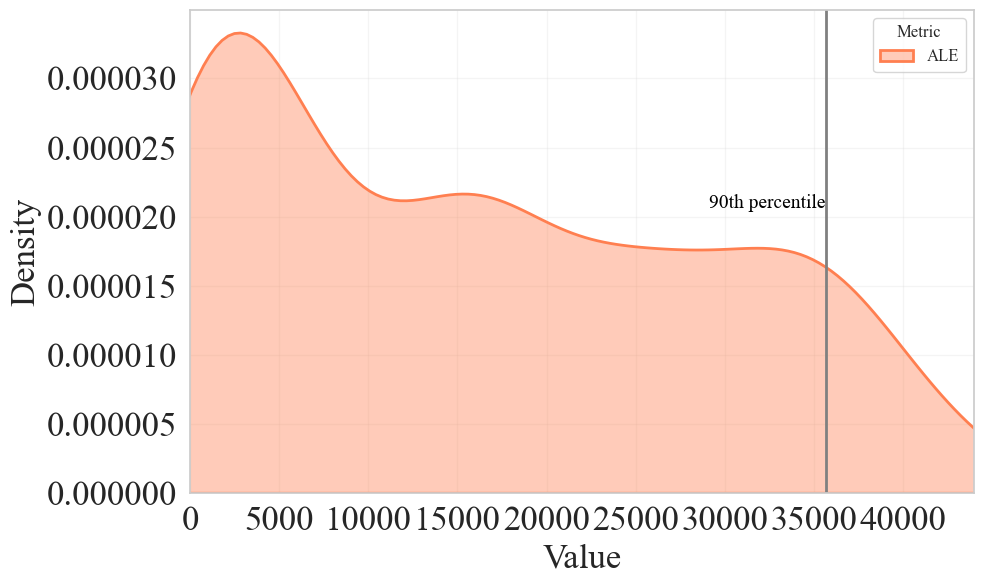

In [ ]:
thr = test_df['ALE'].quantile(0.90)
plt.figure(figsize=(10, 6))
ax = plt.gca()

sns.kdeplot(
    data=test_df,
    x='ALE',
    fill=True,
    label='ALE',
    color='coral',
    alpha=0.4,
    linewidth=2,
)
ax.axvline(thr, color='grey', linestyle='-', linewidth=2)
ax.text(thr, ax.get_ylim()[1]*0.6, '90th percentile', 
        ha='right', va='center', fontsize=14, color='black')
ax.ticklabel_format(axis='y', style='plain')

plt.xlabel("Value", fontsize=25)
plt.ylabel("Density", fontsize=25)
plt.legend(title="Metric", fontsize=12, title_fontsize=12, loc='upper right')
plt.grid(True, linestyle='-', alpha=0.2)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 1.0 * test_df[['ALE']].max().max())  
plt.tight_layout()
plt.show()


In [604]:
thr = test_df['ALE'].quantile(0.90)
thr

35663.97448843784